# imports

In [29]:
##### import python libs #####
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

## Define path for output figures ##
PathFigures = "/all_mounts/masp26/SMOS_artic/BennetProjects/CACOON/PMann/_figs/"

##### import Lena River discharge #####
##### discharge data source https://arcticgreatrivers.org/data/ #####
fp_AG_new= r"/home/bjuhls/Dropbox/lena_breakup/Data/Lena_Kyusyur_1936_2020.csv"
Discharge_36to20 = pd.read_csv(fp_AG_new, sep=";",parse_dates=["date"])

# split in arrays by year
Discharge_36to20['year'] = Discharge_36to20.date.dt.year
Discharge_36to20['date'] = Discharge_36to20.date.dt.strftime('%m-%d')
Discharge_36to20_unstacked = Discharge_36to20.set_index(['year', 'date']).discharge.unstack(-2)
Dis2Arr = np.array(Discharge_36to20_unstacked) # discharge values of every year, split into 1 array / yr

ListDatesDischarge = []
for e in Discharge_36to20_unstacked.index:
    ListDatesDischarge.append(e) # List of dates (mm-dd) for one year

# Find date and discharge value of breakup peak flow

In [49]:
### finding Max discharge Peak and Date of it

yearsDischarge = np.arange(1936,2021,1)
DOY = np.arange(1,367,1)
DatesOfMax = []
DischargeOfMax = []

for i, e in enumerate(yearsDischarge[:]):
    Discharge = Discharge_36to20_unstacked[e].tolist()
    IndexMax = Discharge.index(max(Discharge)) #get the index of the maximum
    maxDOY = DOY[IndexMax] # get the date by the found max index
    DatesOfMax.append(maxDOY) # append the date to the list
    DischargeOfMax.append(max(Discharge)) # append the max discharge value to list
len(DischargeOfMax)

85

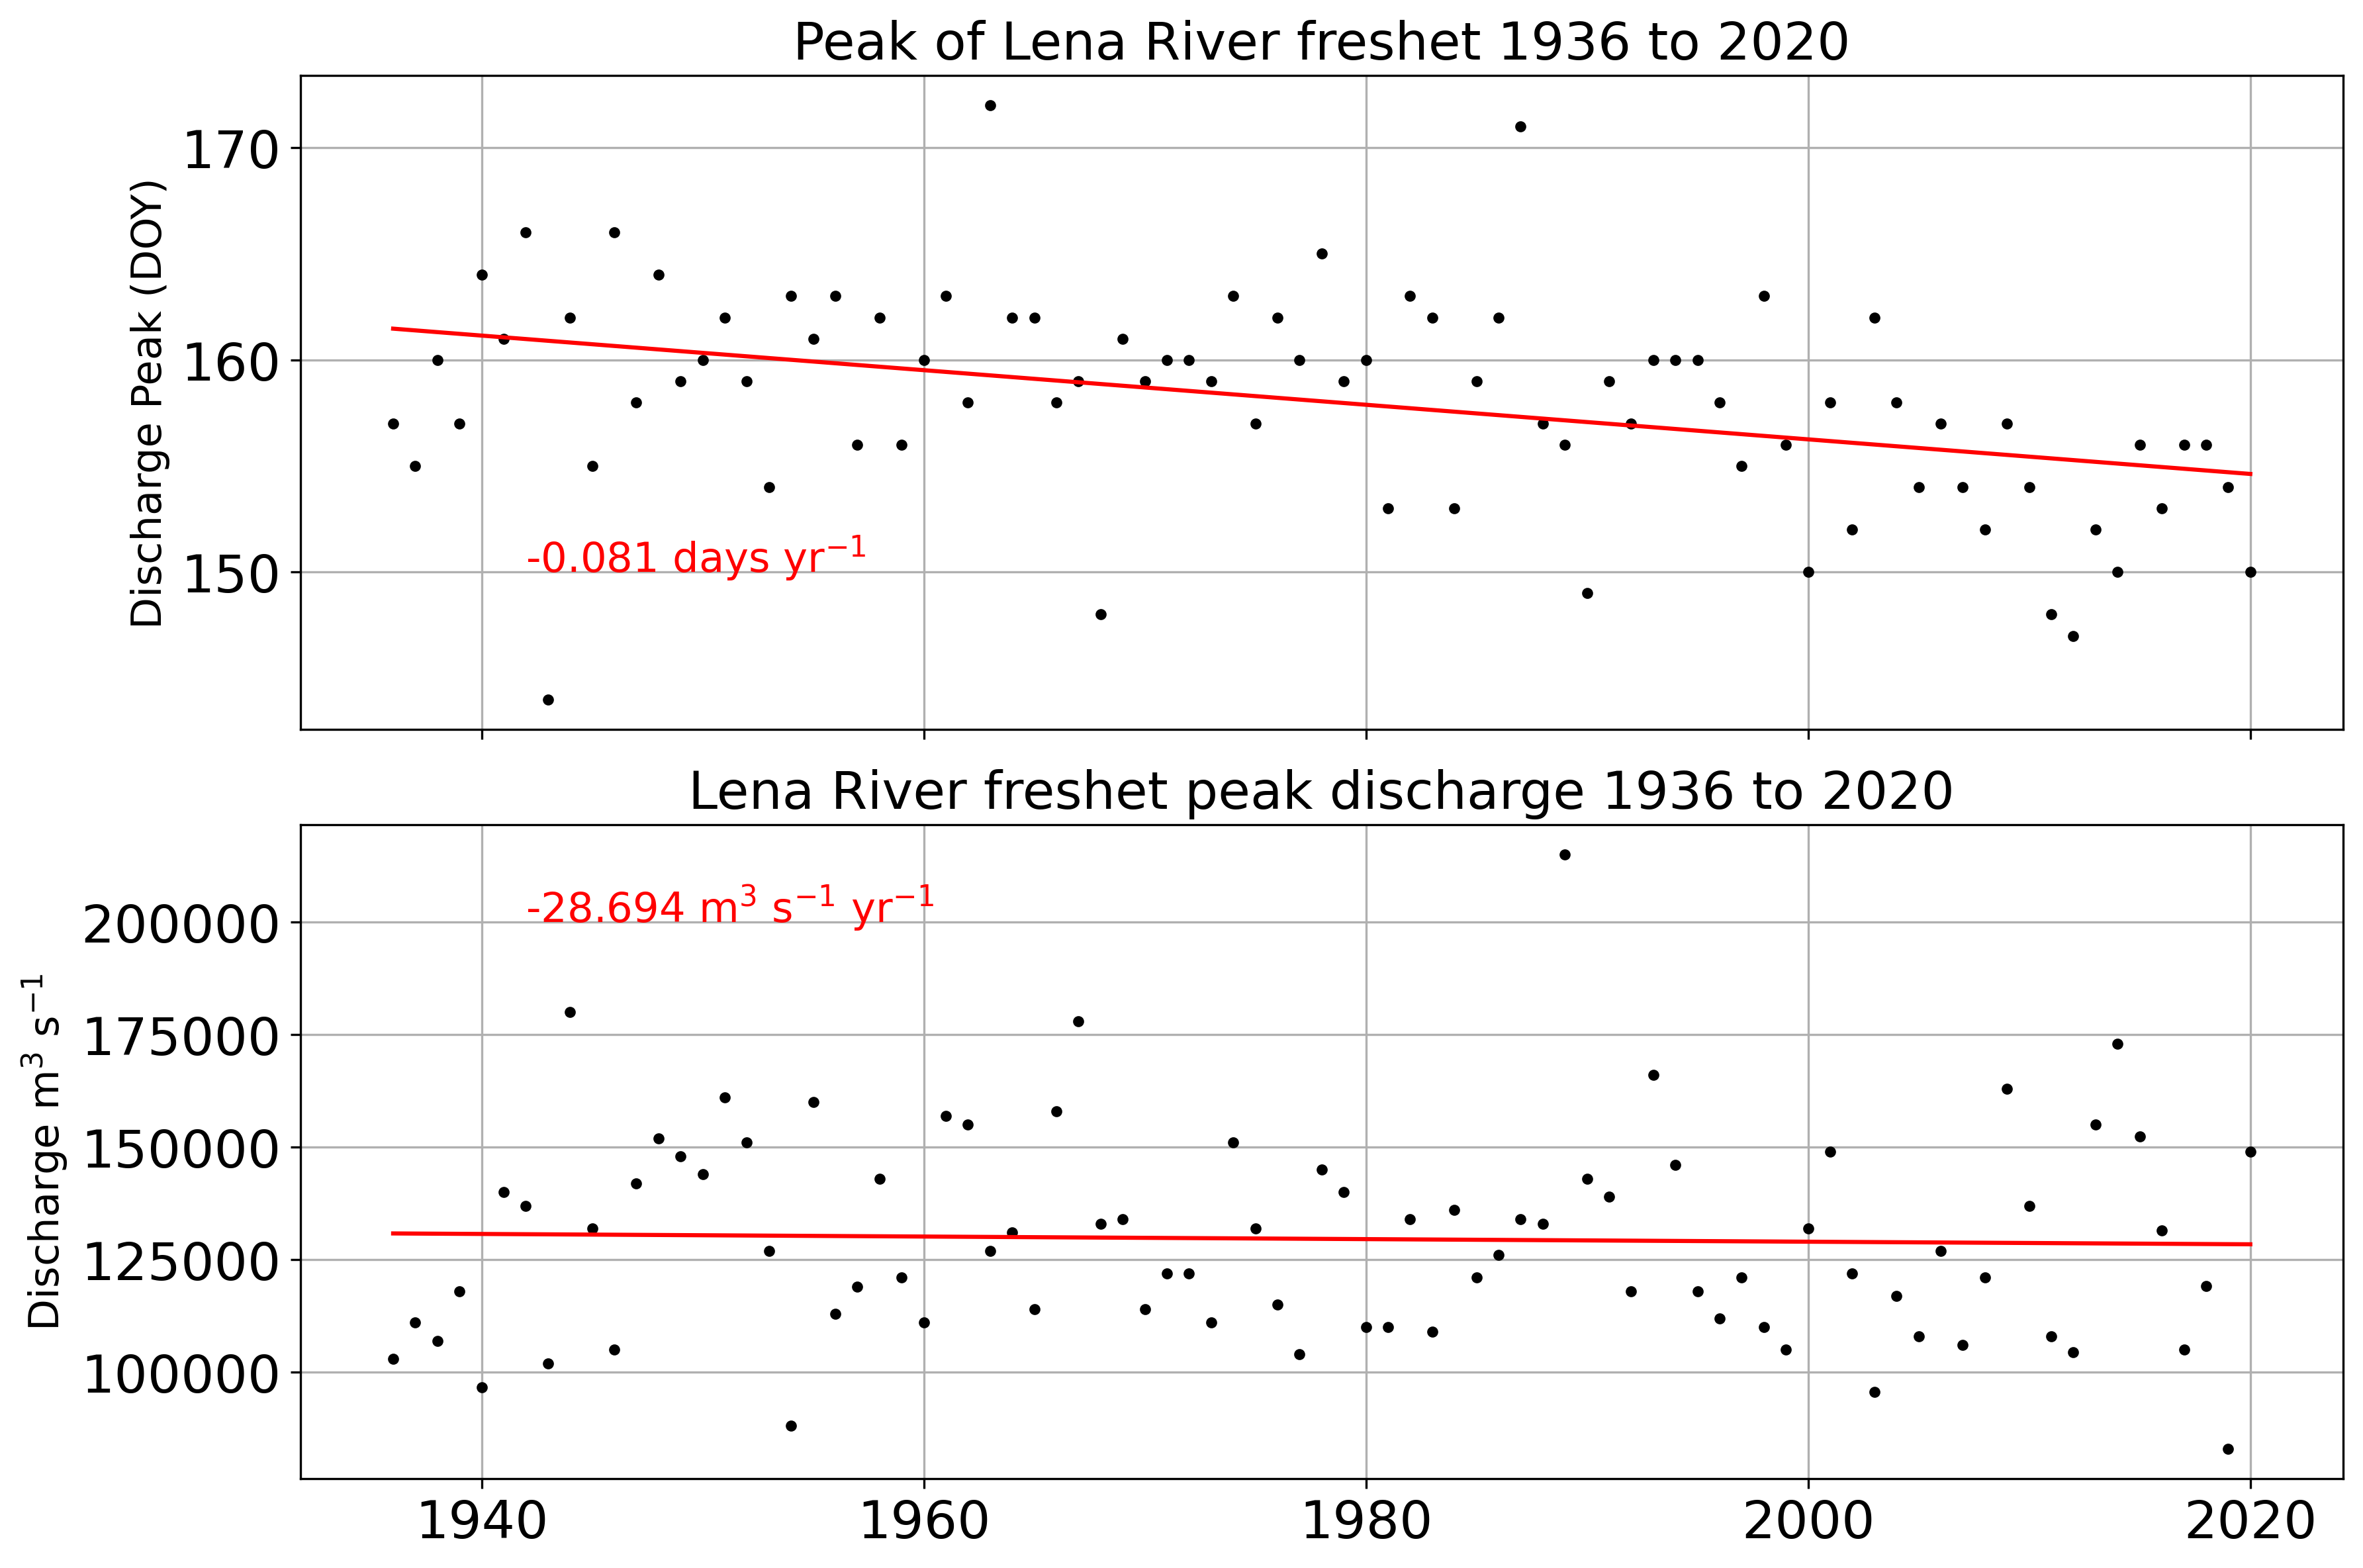

In [48]:
#### Plotting max freshet value and date over time

f, (( ax1, ax2 )) = plt.subplots(2, 1,figsize=(12,8), dpi=300, sharex=True)

###### linear regression for dates
poly_fit = np.polyfit(yearsDischarge, DatesOfMax, 1)
fit_fn = np.poly1d(poly_fit)

Slope = round(fit_fn[1], 3) # slope of linear regression
######

ax1.plot(yearsDischarge, DatesOfMax, "k.")
ax1.plot(yearsDischarge, fit_fn(yearsDischarge),"r-" )
ax1.grid()
ax1.set_title("Peak of Lena River freshet 1936 to 2020", fontsize=19)
ax1.set_ylabel("Discharge Peak (DOY)", fontsize=15) # 10$^{+3}$
ax1.text(1942, 150, str(Slope) + " days yr$^{-1}$", fontsize=15, color= "r")
ax1.tick_params(axis='both', which='major', labelsize=19)

###### linear regression for discharge values
poly_fit = np.polyfit(yearsDischarge, DischargeOfMax, 1)
fit_fn = np.poly1d(poly_fit)

Slope = round(fit_fn[1], 3) # slope of linear regression
######


ax2.plot(yearsDischarge, DischargeOfMax, "k.")
ax2.plot(yearsDischarge, fit_fn(yearsDischarge),"r-" )
ax2.grid()
ax2.set_title("Lena River freshet peak discharge 1936 to 2020", fontsize=19)
ax2.set_ylabel("Discharge m$^3$ s$^{-1}$", fontsize=15) # 10$^{+3}$
ax2.text(1942, 200000, str(Slope) + " m$^3$ s$^{-1}$ yr$^{-1}$", fontsize=15, color= "r")
ax2.tick_params(axis='both', which='major', labelsize=19)

plt.tight_layout()
plt.savefig(PathFigures + "DischargePeakTrends.png", dpi=300)
plt.show()

# Find start of freshet

146


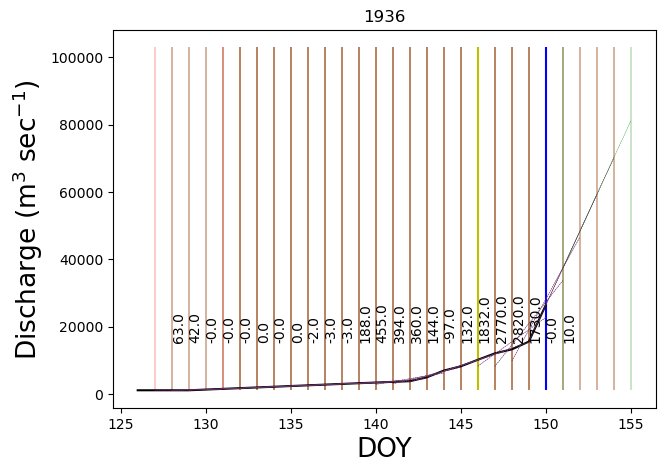

146


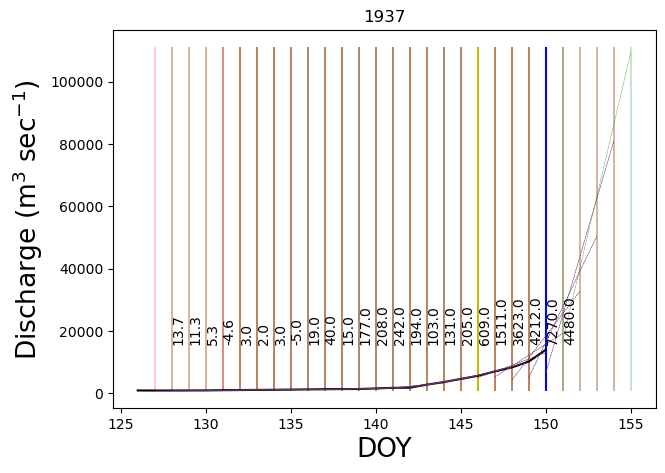

143


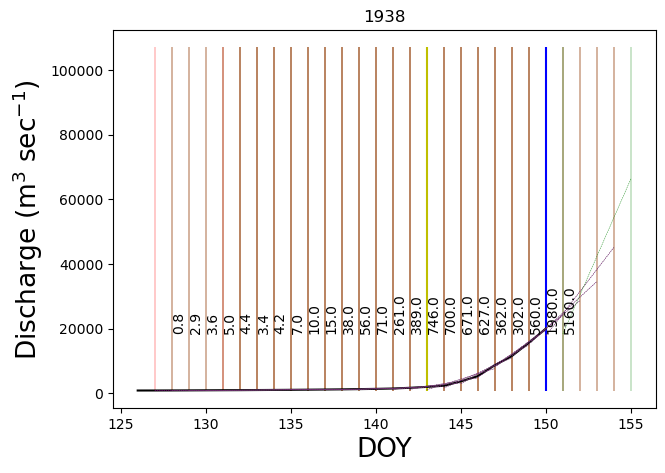

143


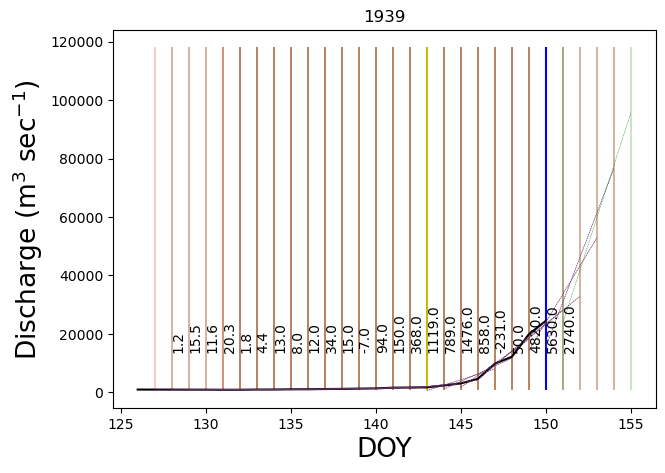

151


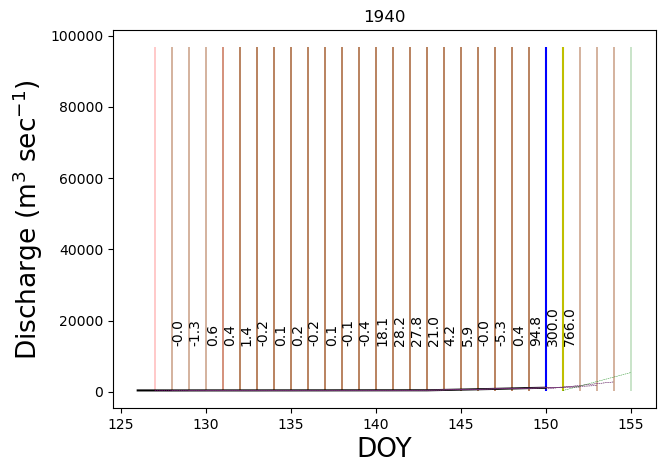

148


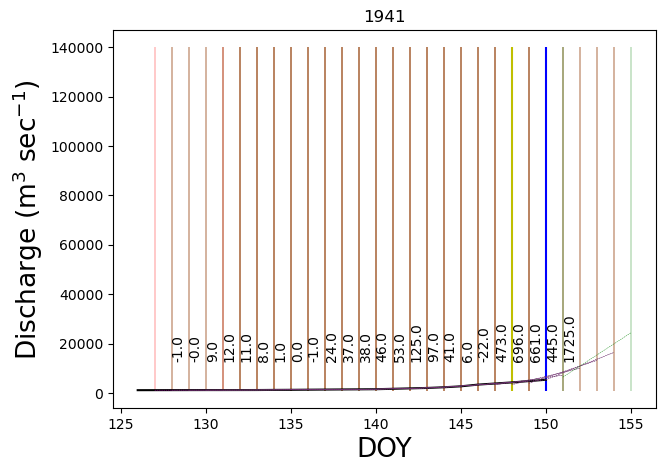

143


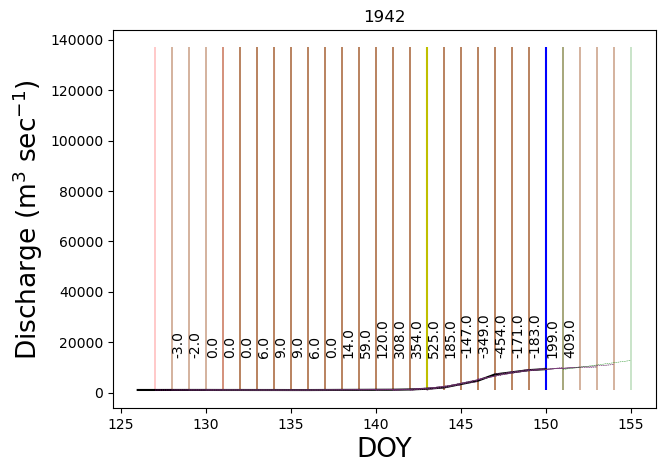

135


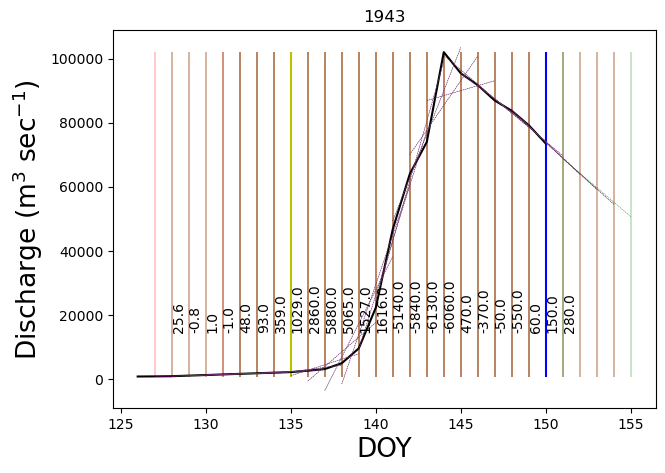

144


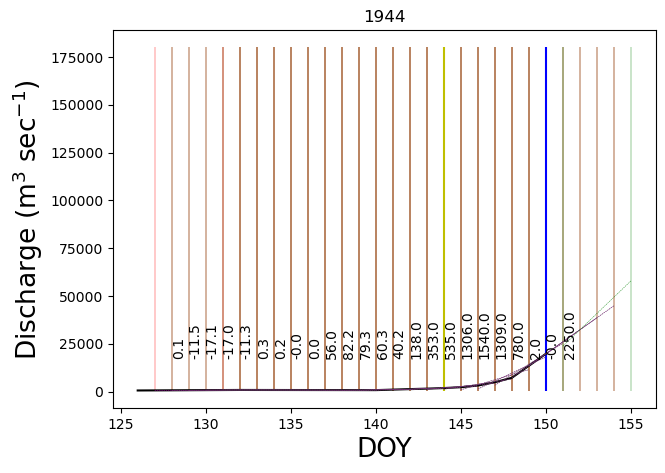

146


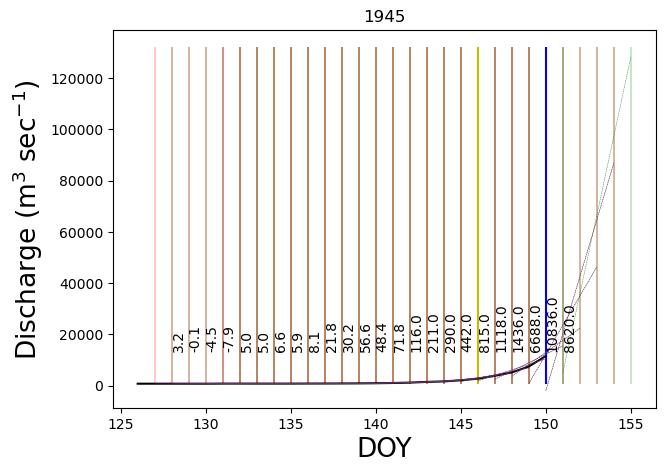

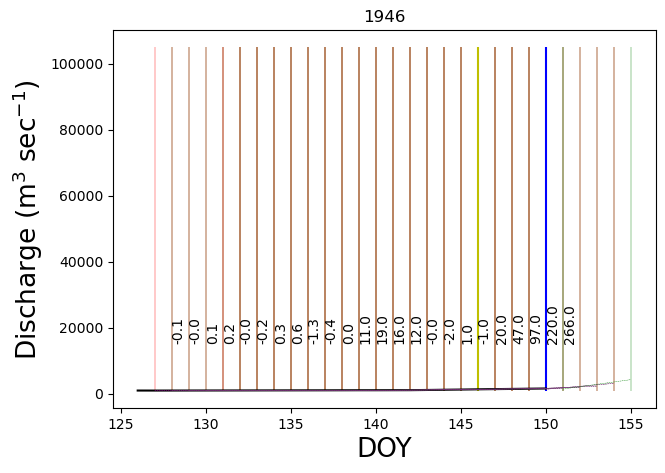

140


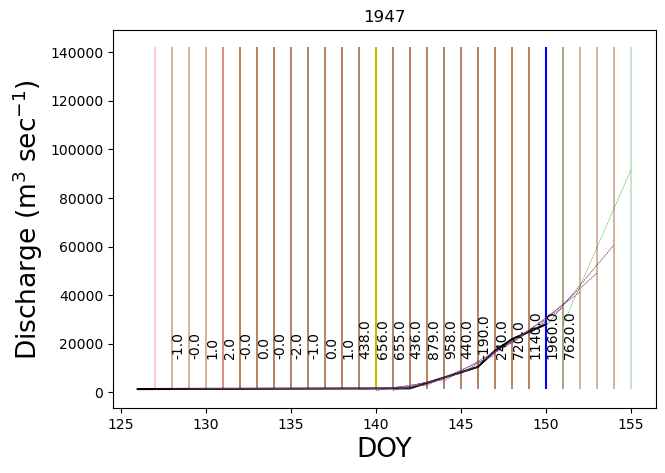

148


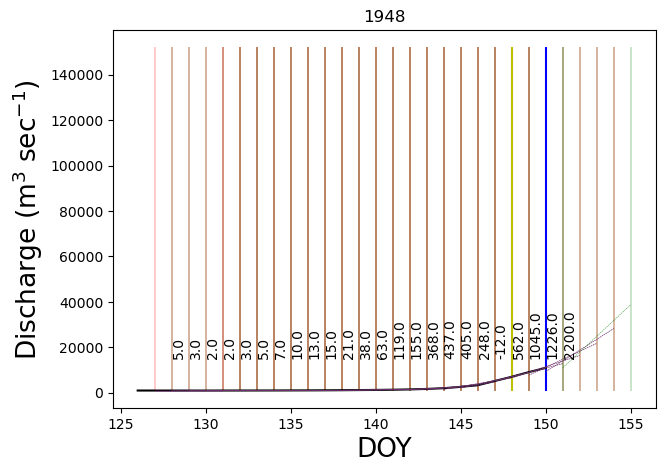

145


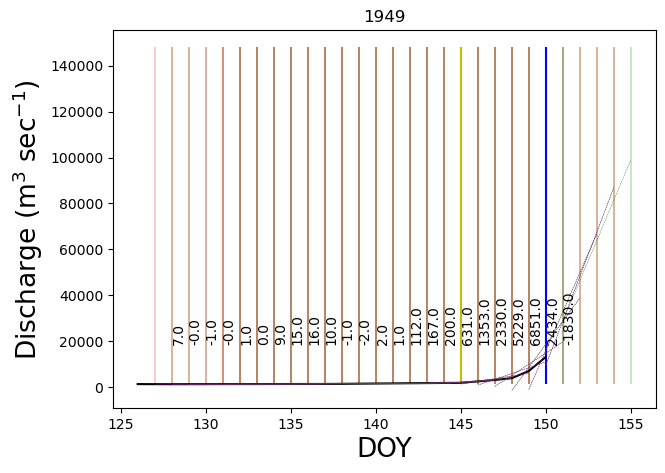

147


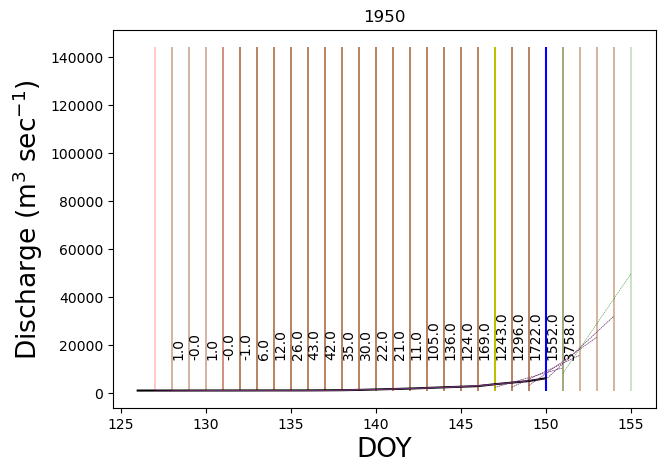

148


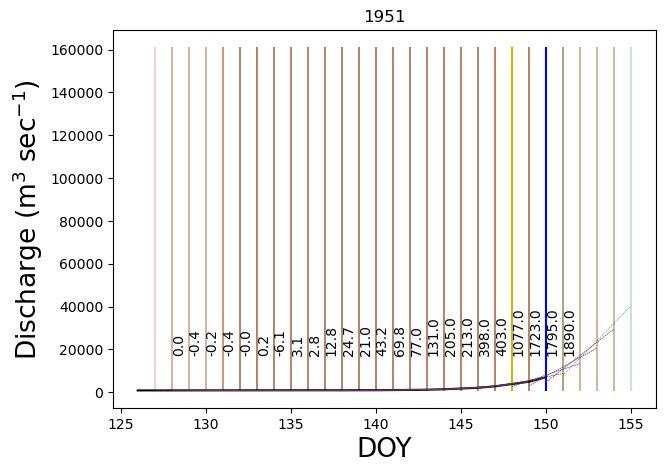

144


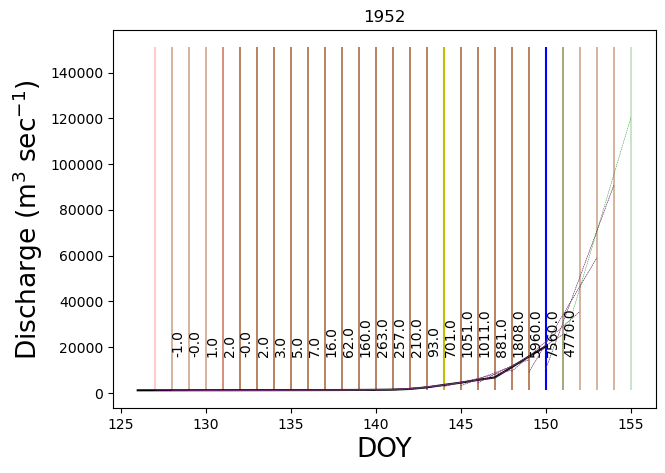

140


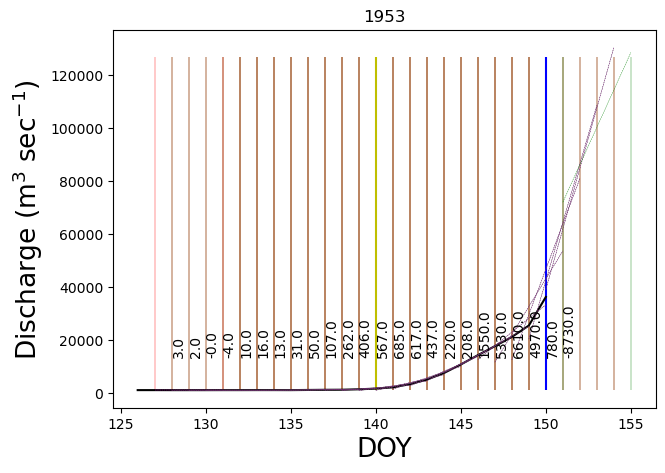

149


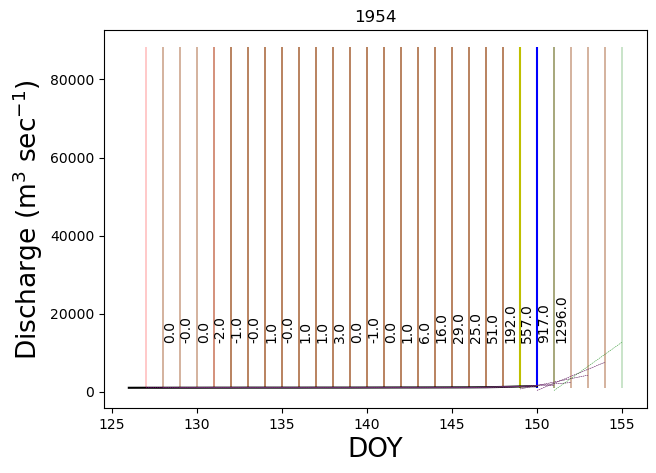

147


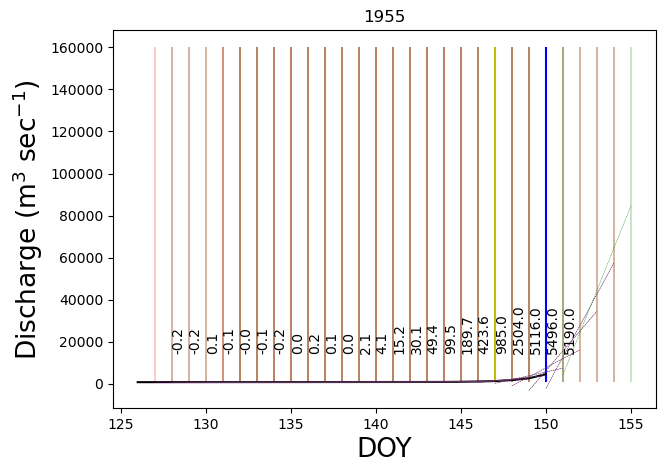

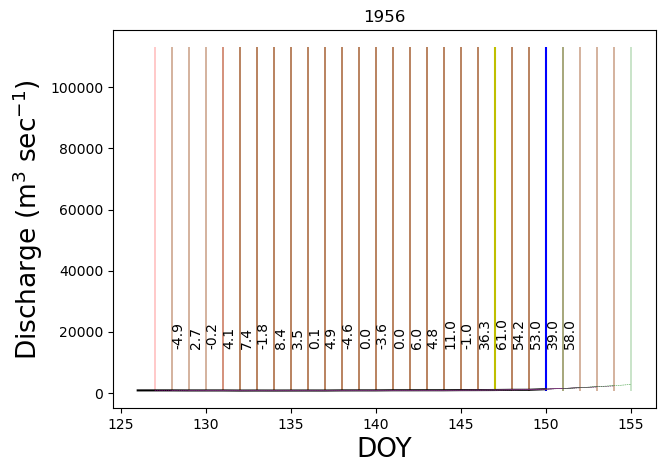

146


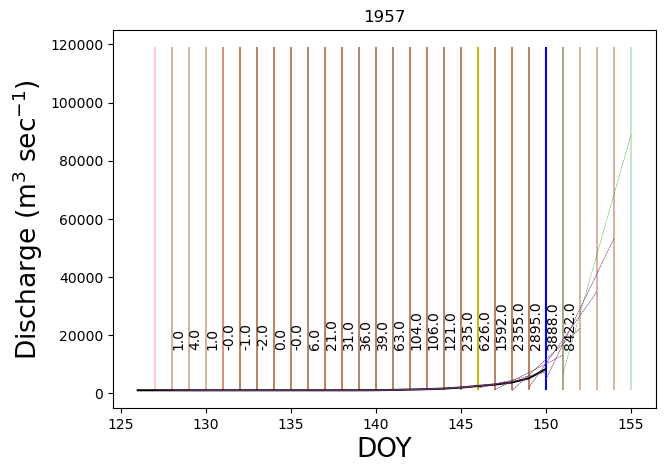

150


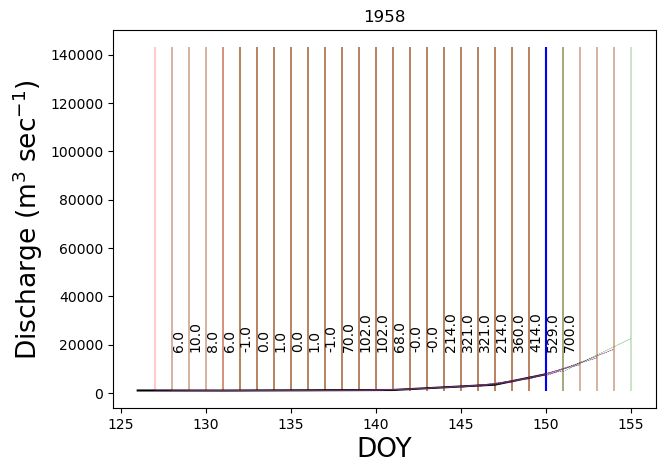

144


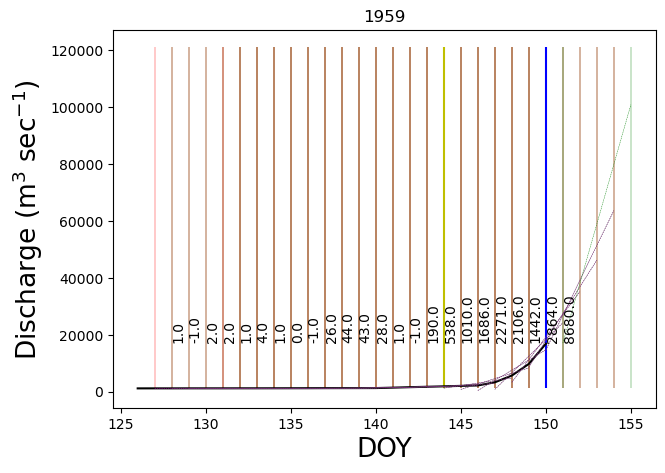

151


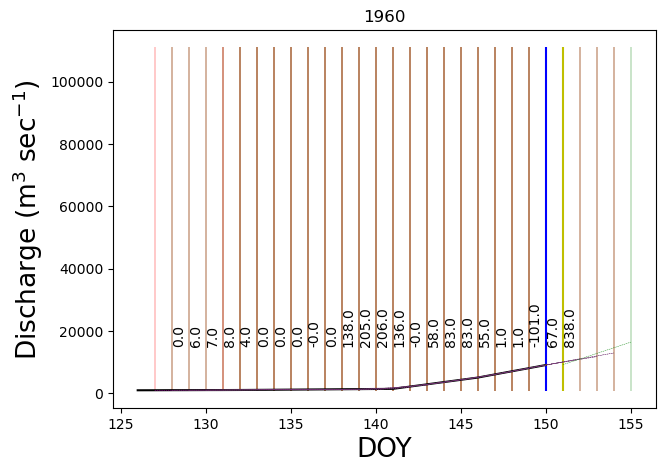

149


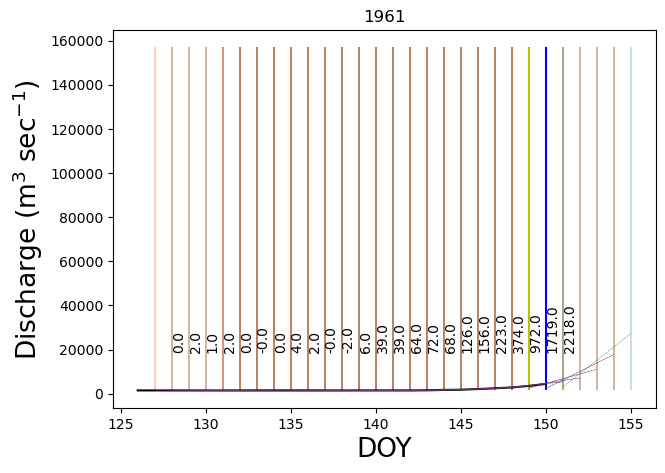

142


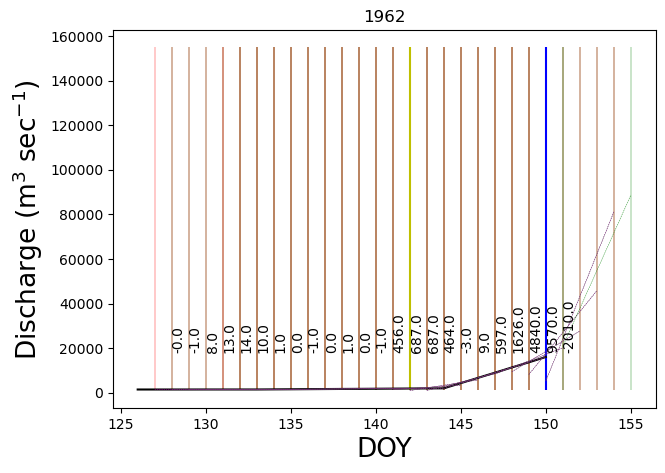

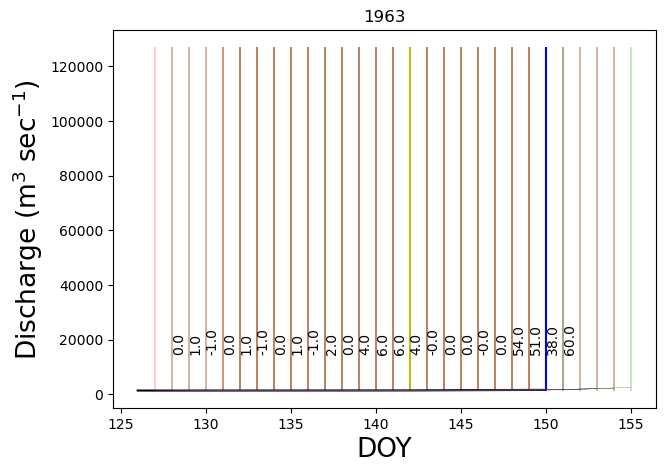

149


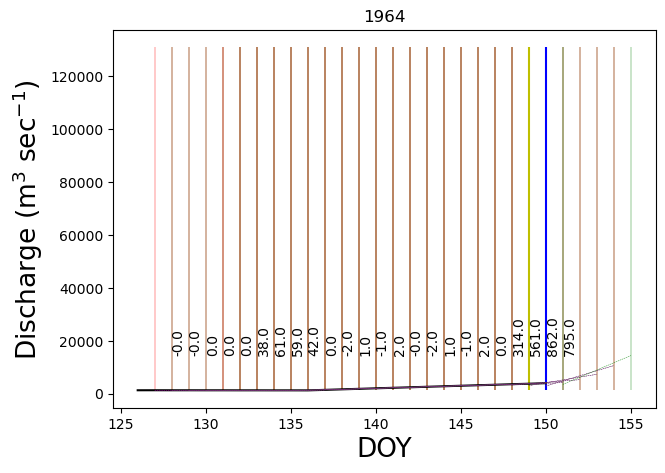

145


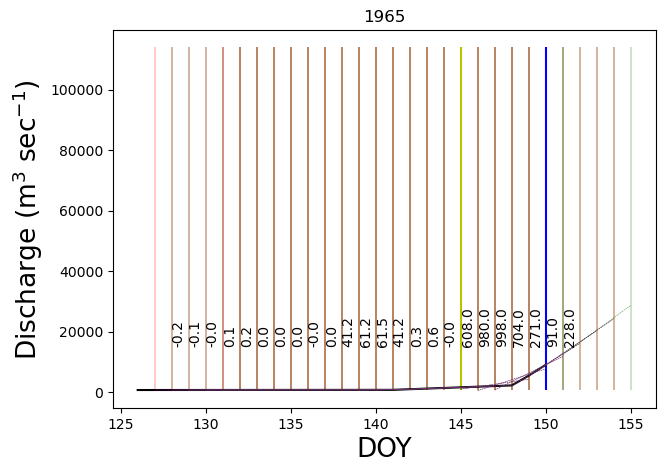

149


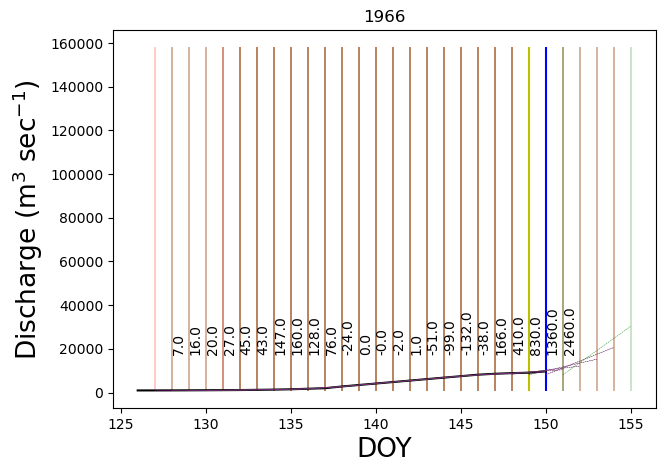

138


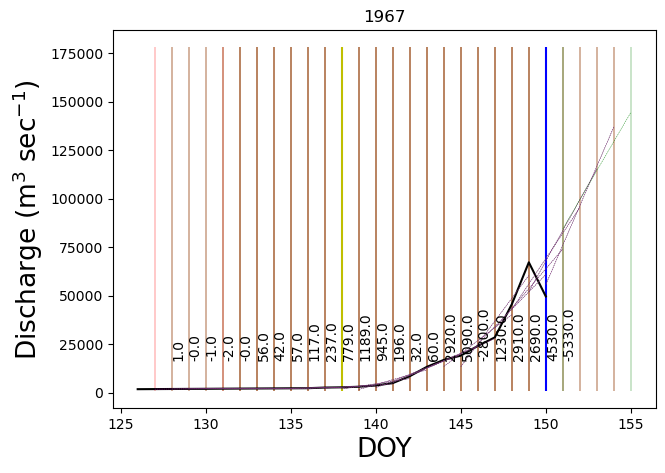

138


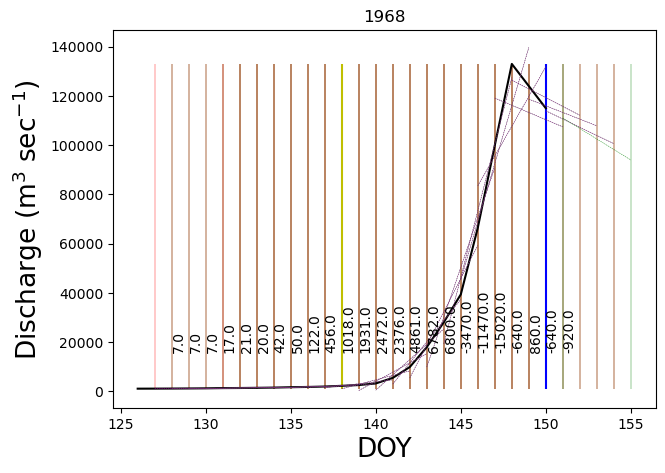

149


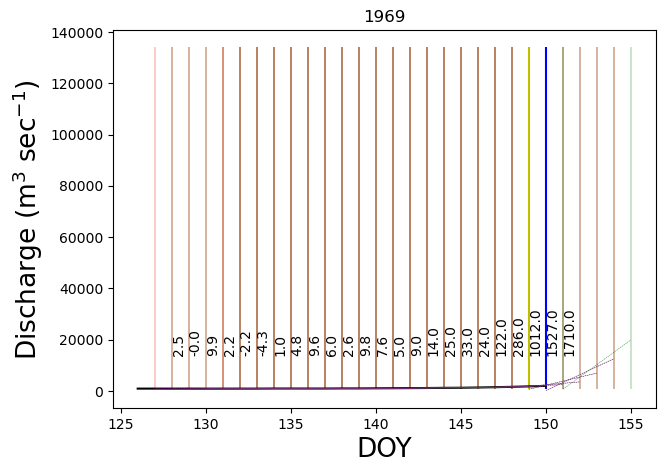

146


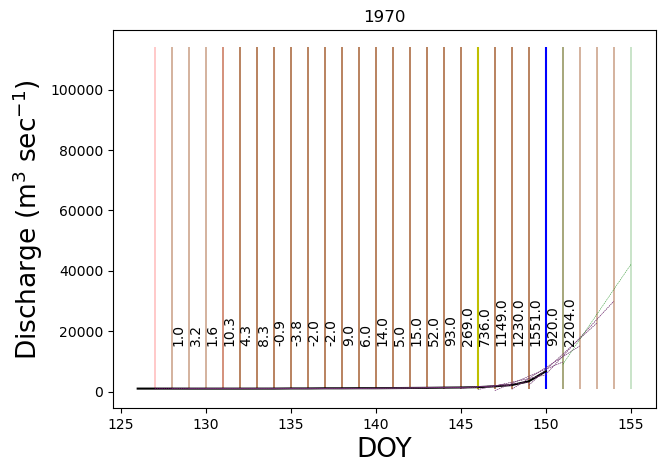

145


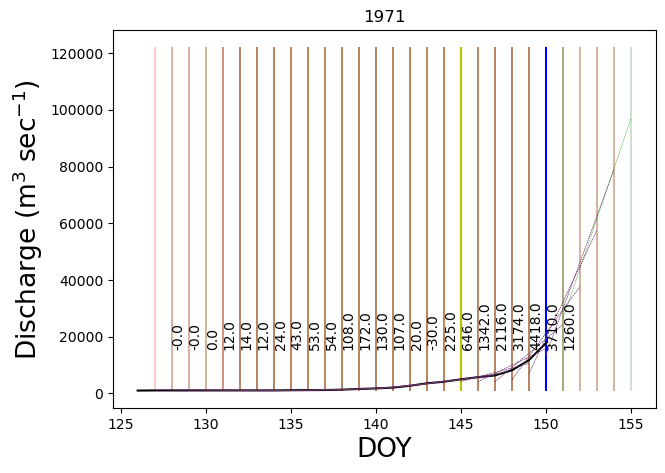

148


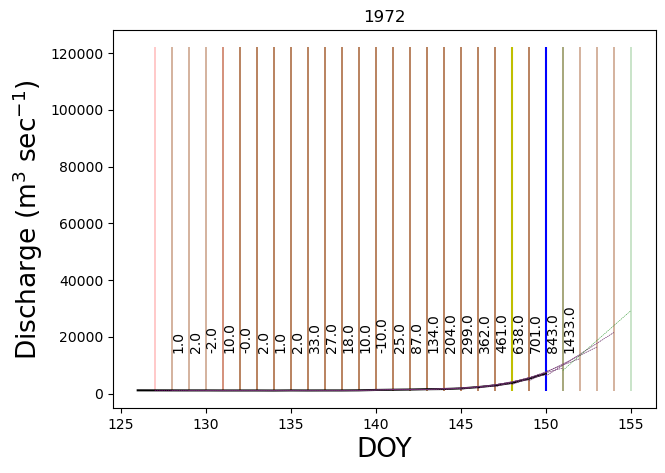

149


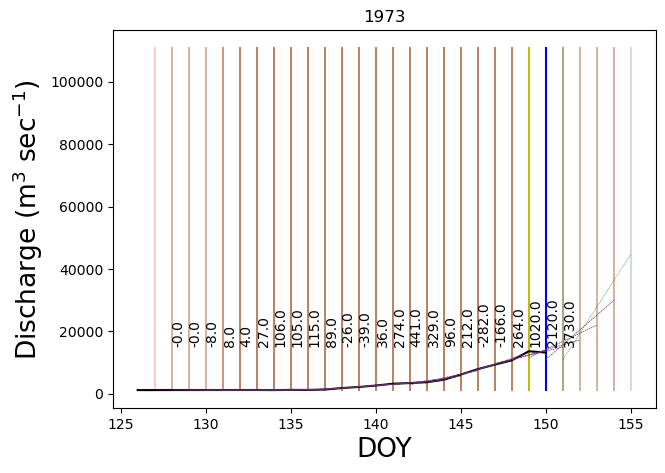

146


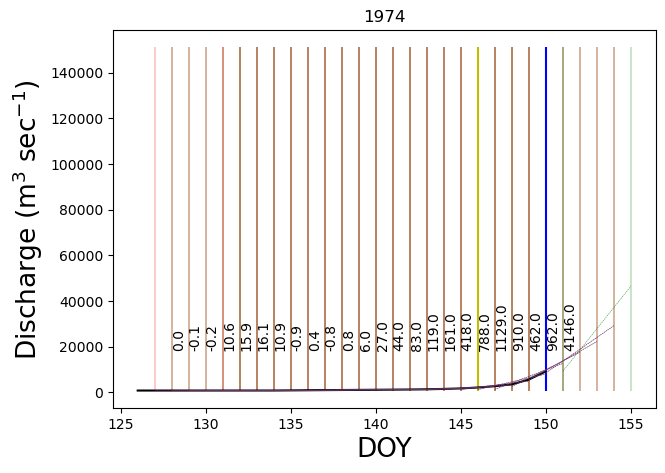

138


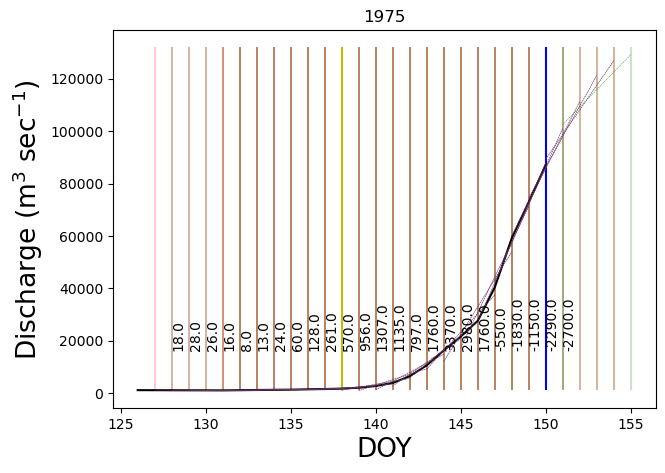

148


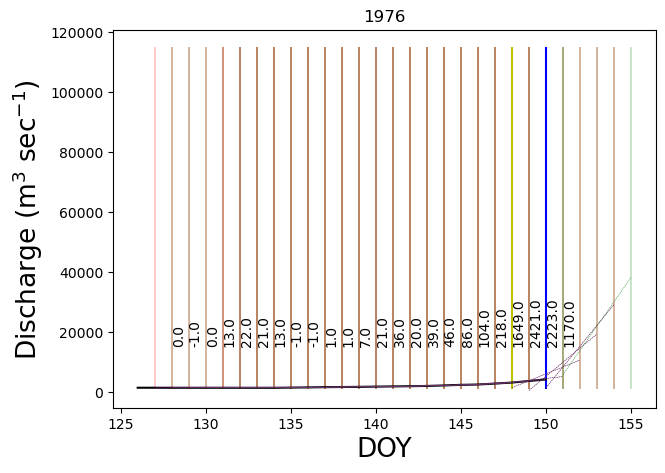

142


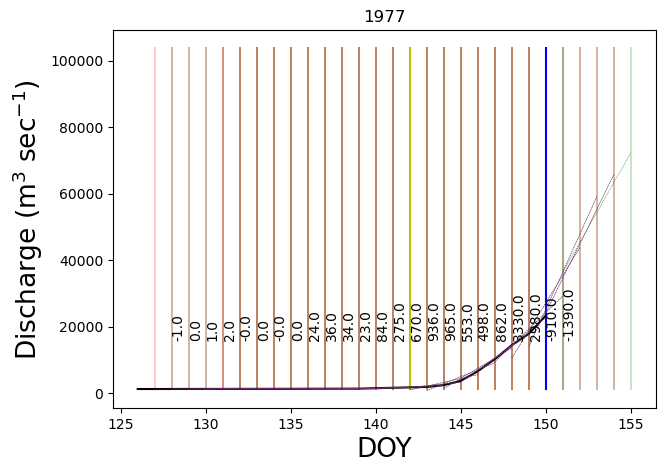

148


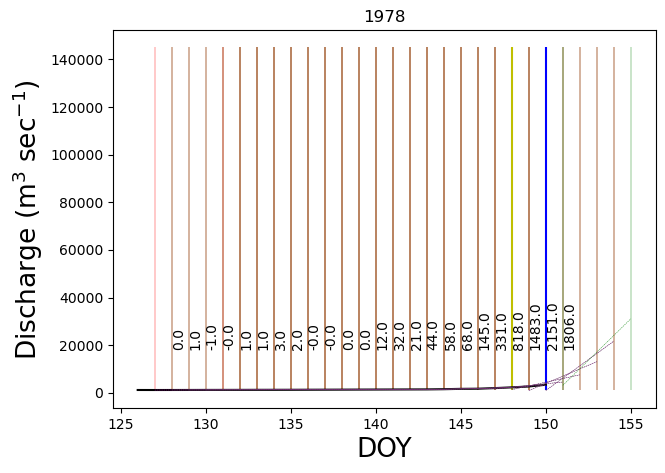

143


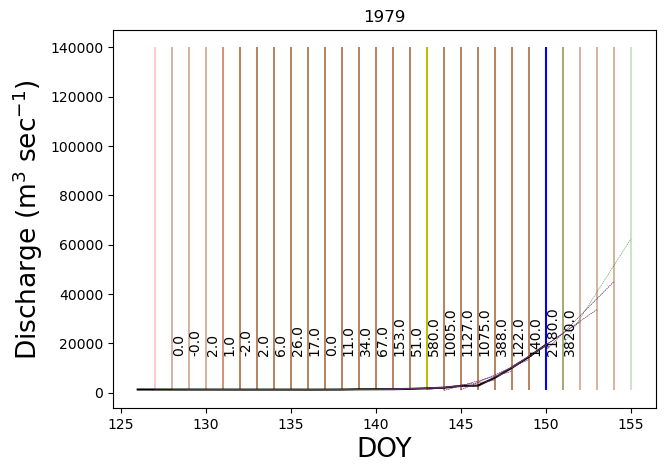

146


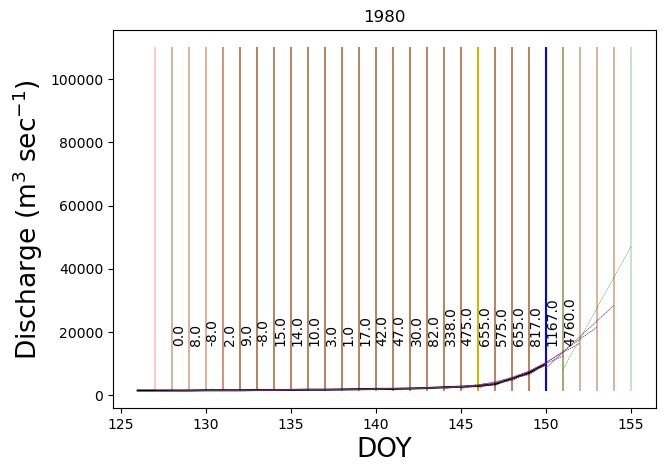

143


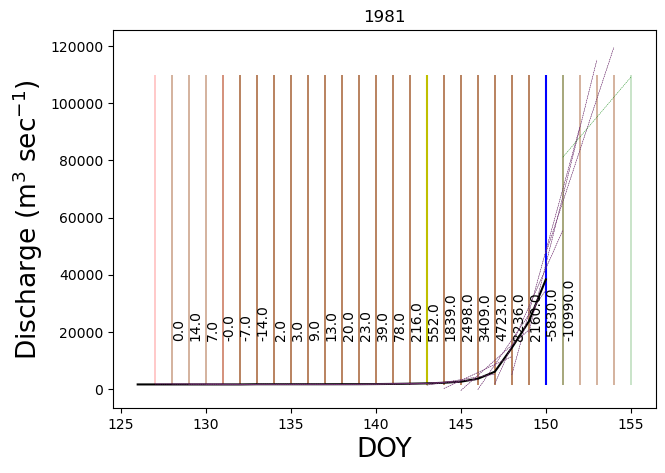

144


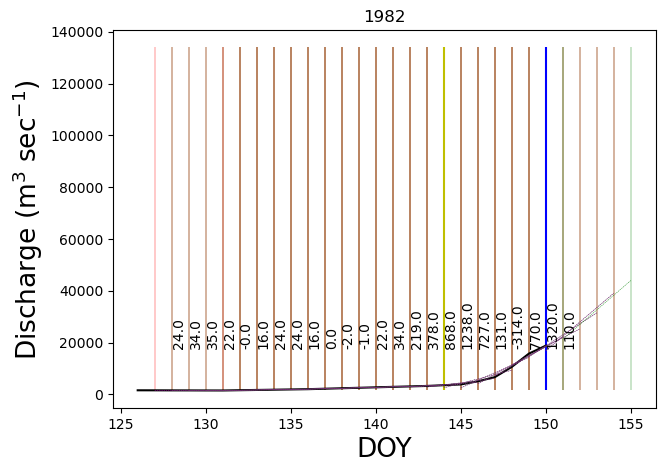

147


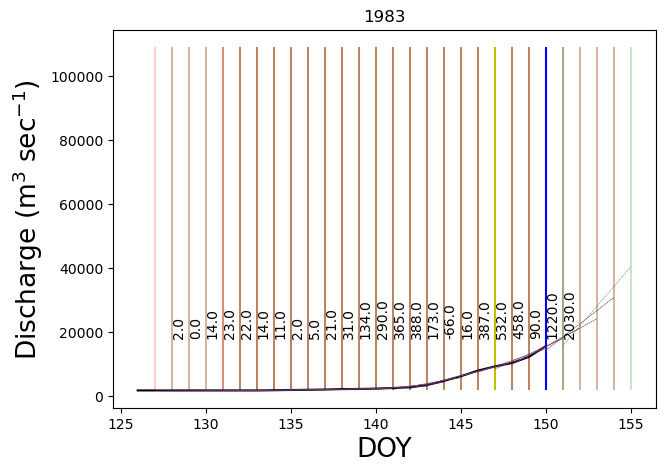

136


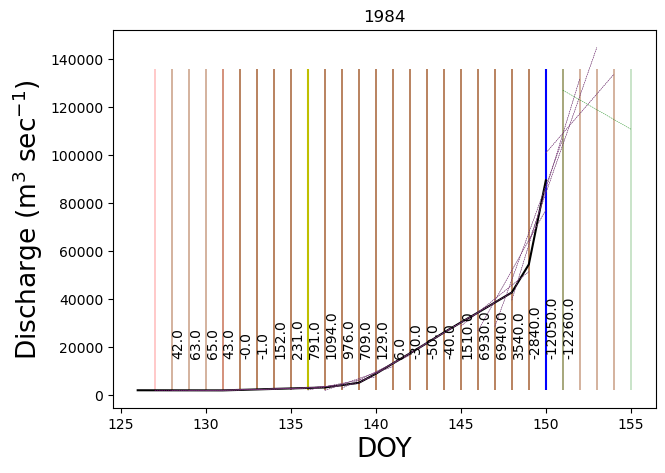

141


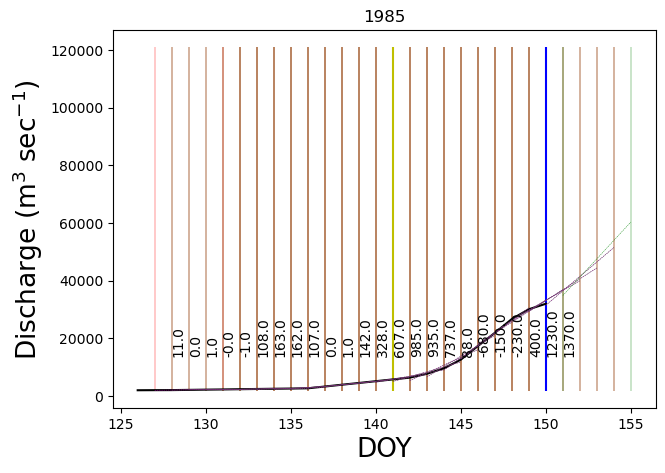

150


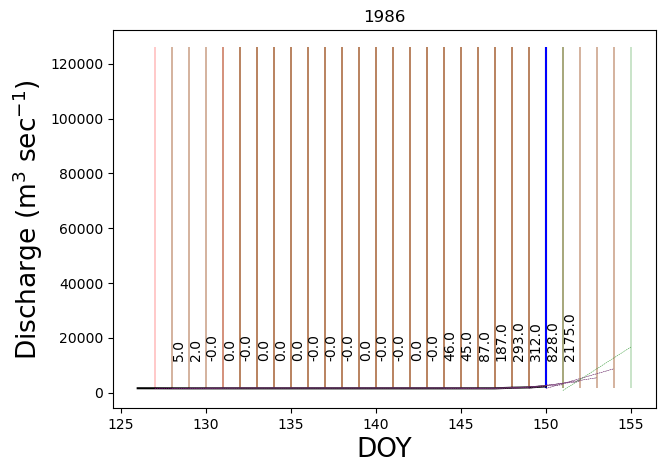

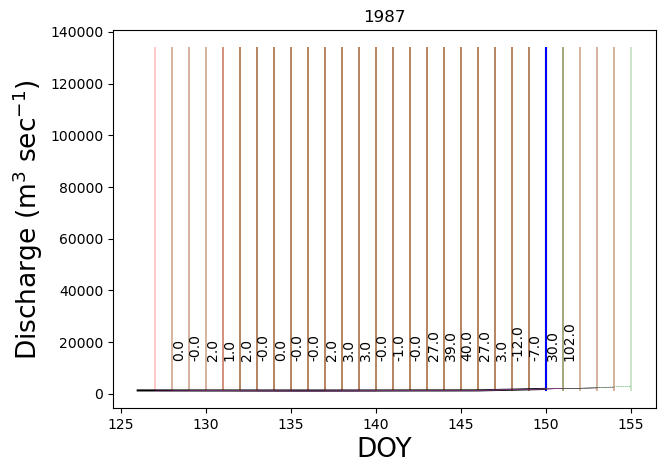

139


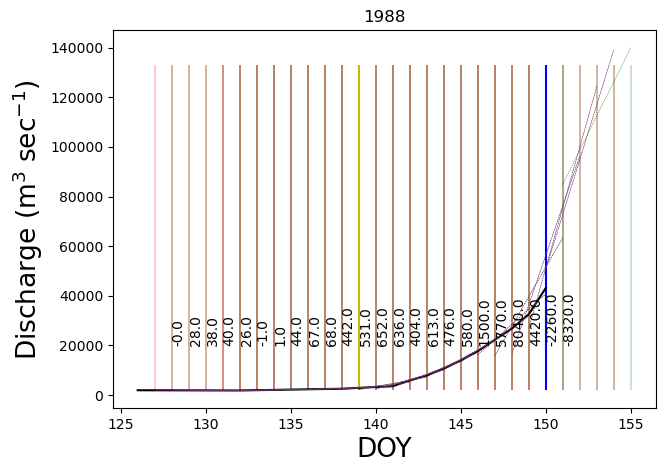

140


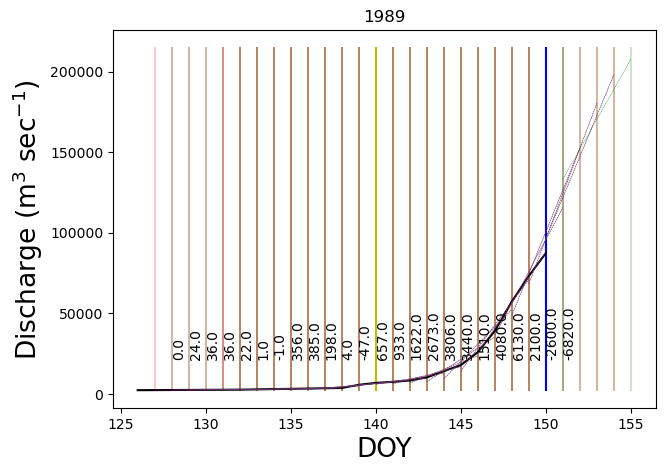

137


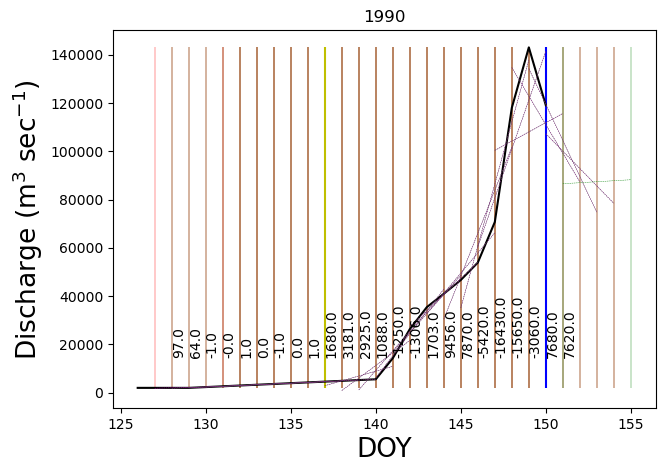

150


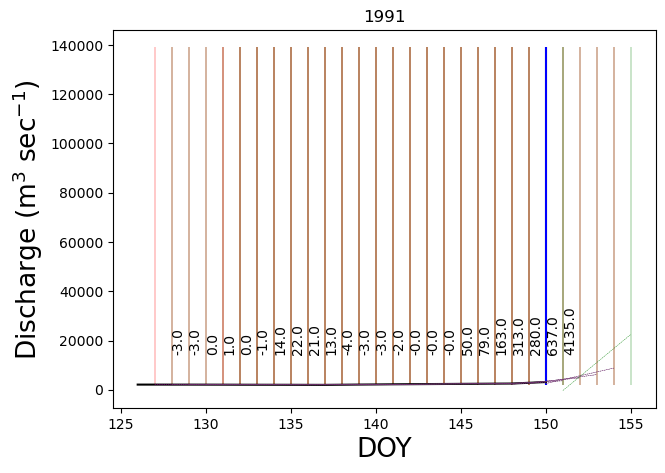

144


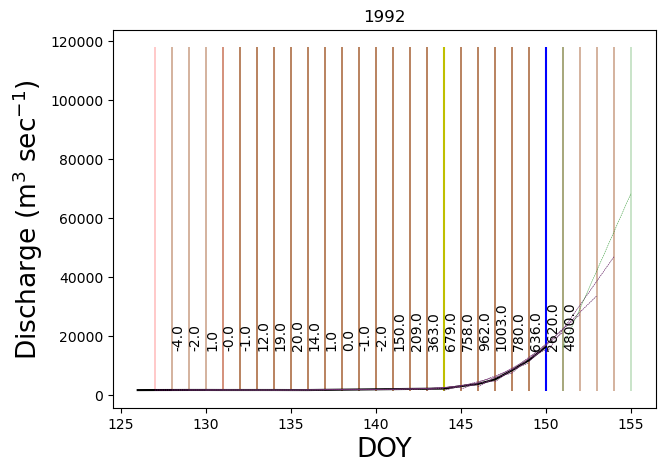

147


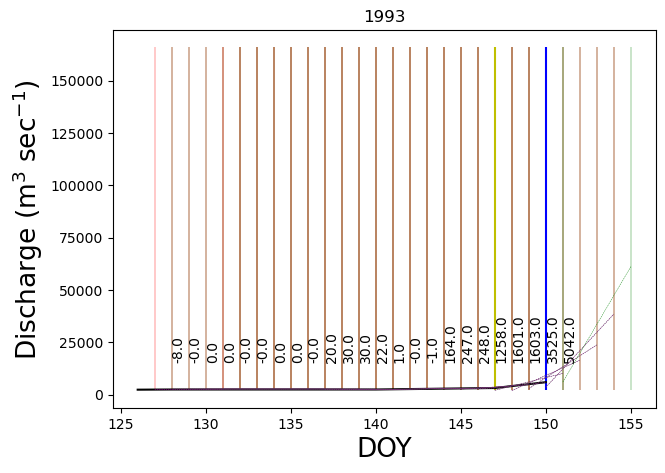

148


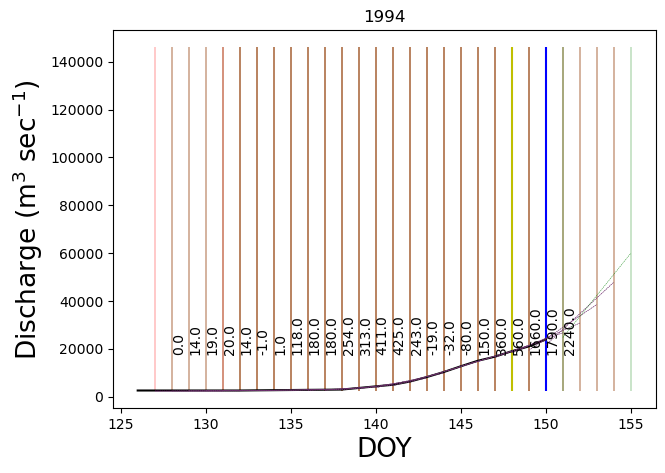

150


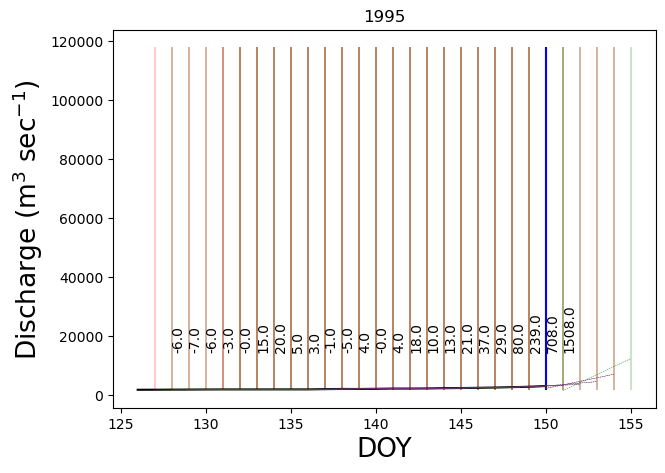

143


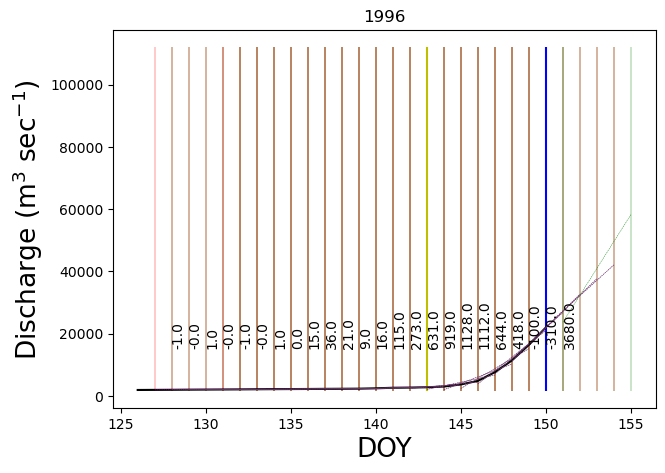

140


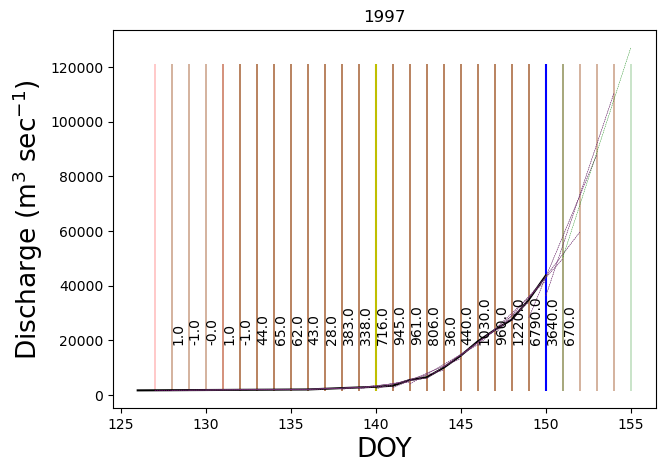

148


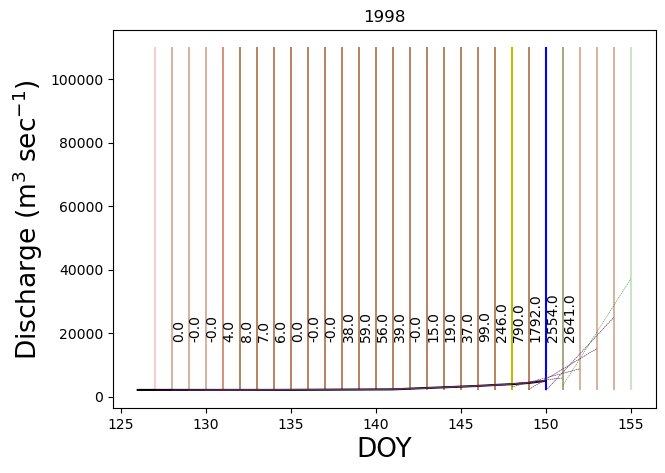

144


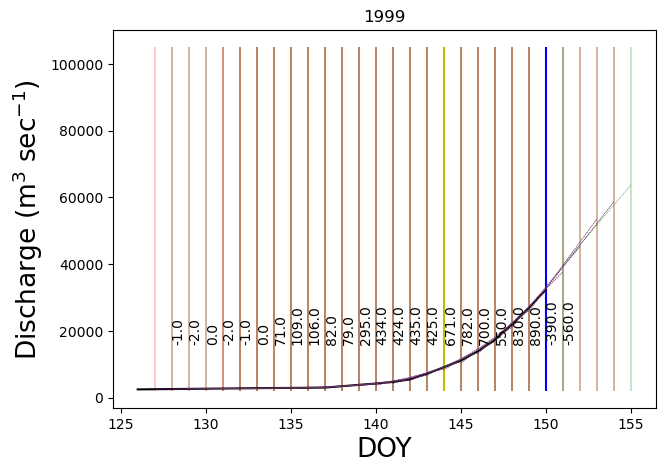

138


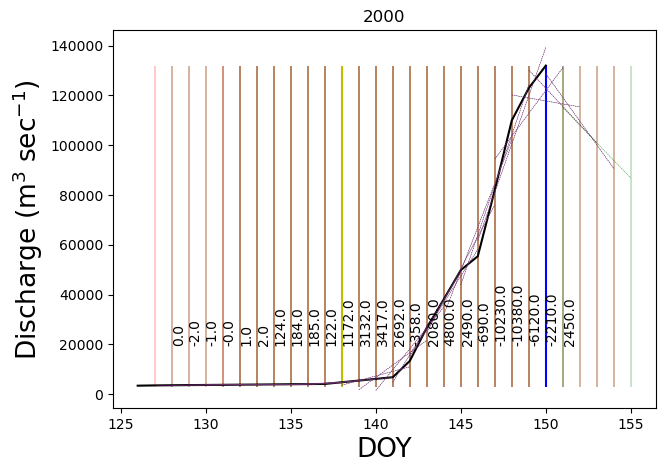

142


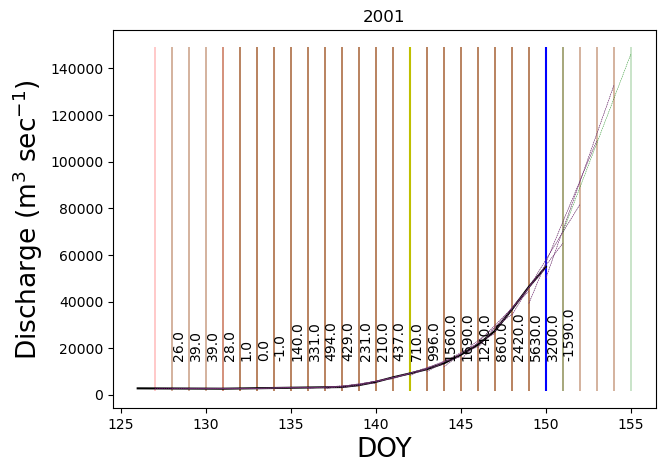

144


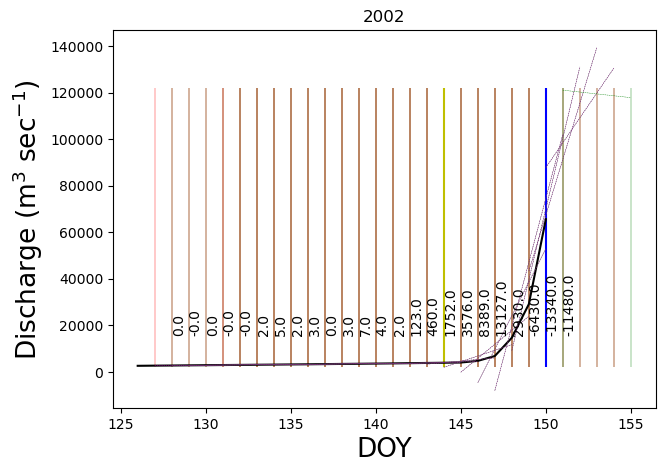

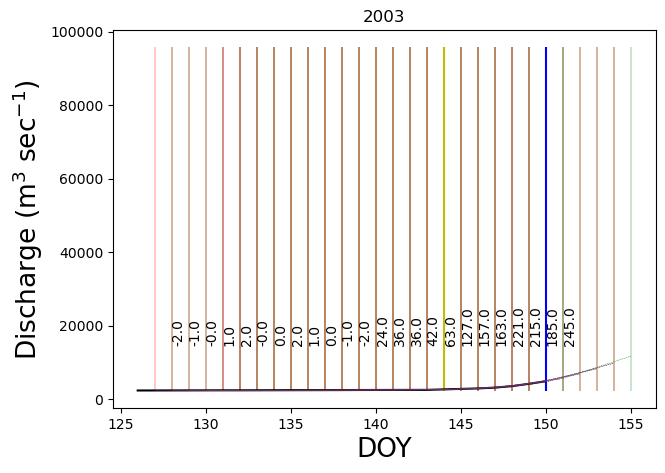

149


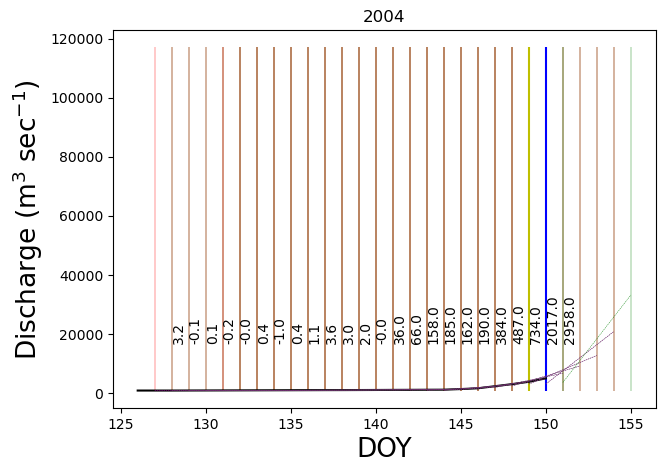

133


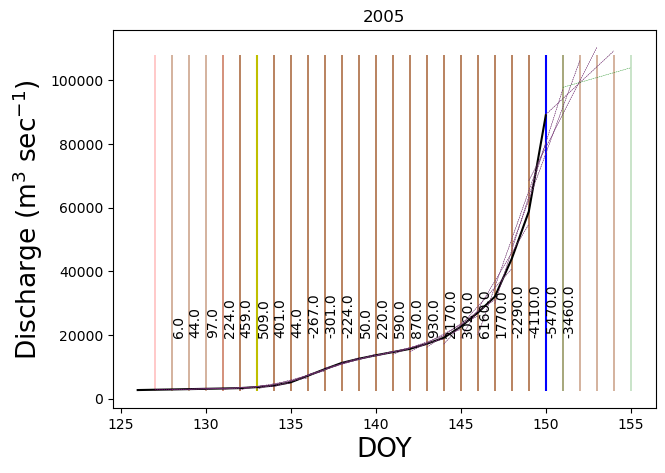

144


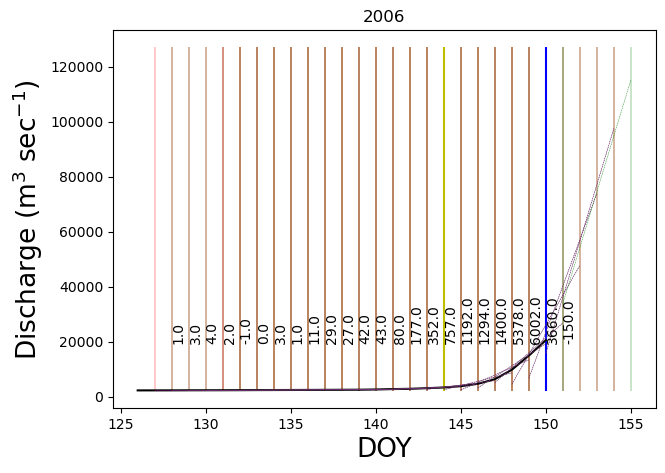

141


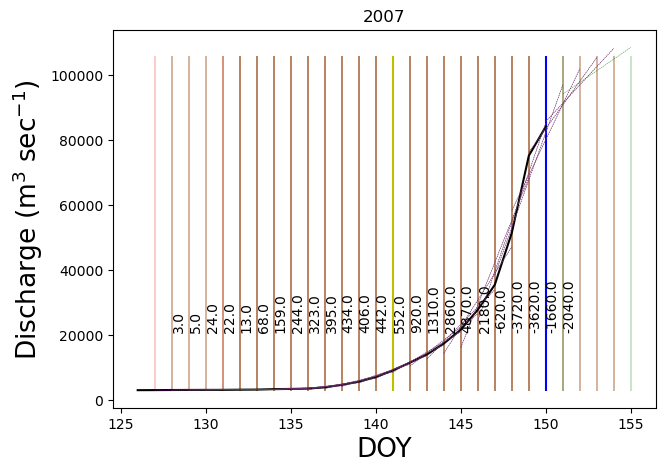

142


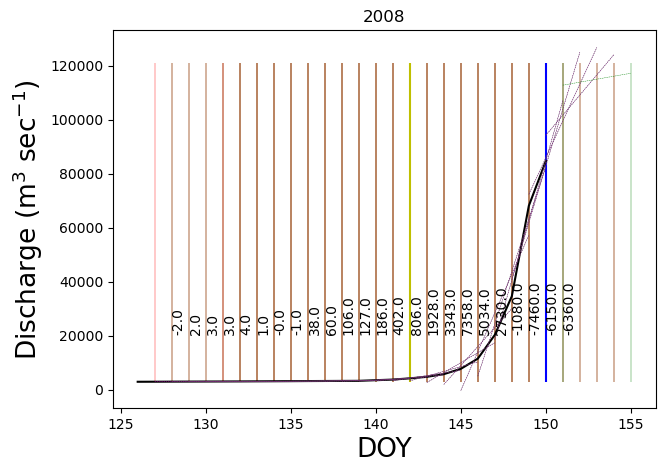

140


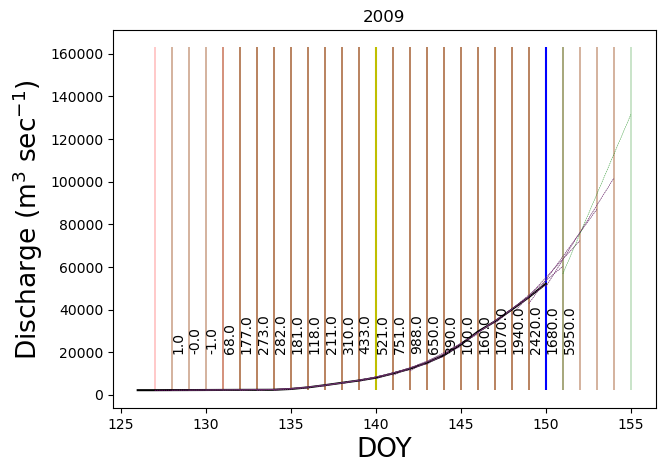

137


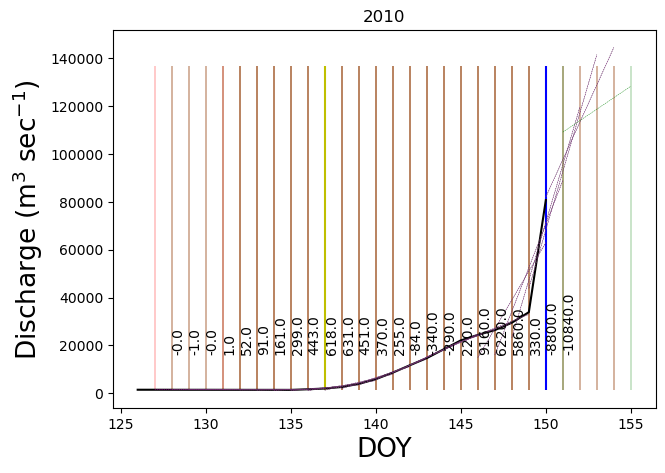

139


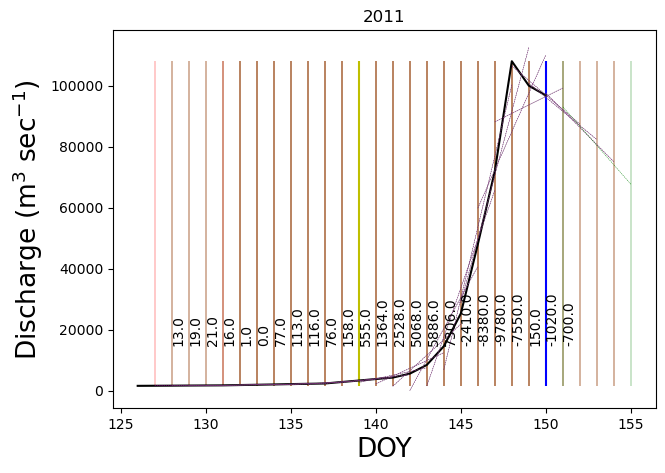

135


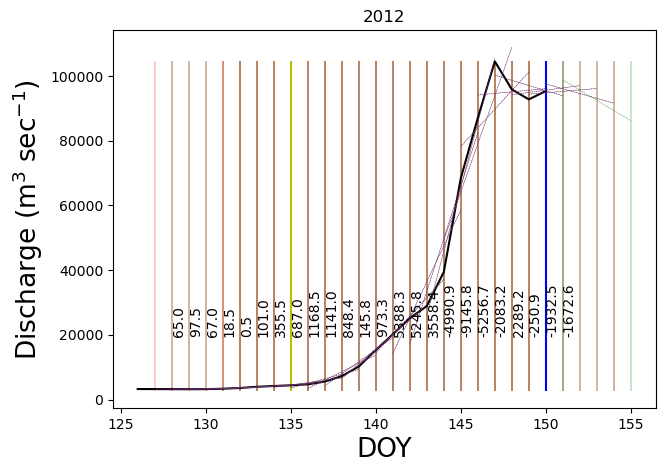

140


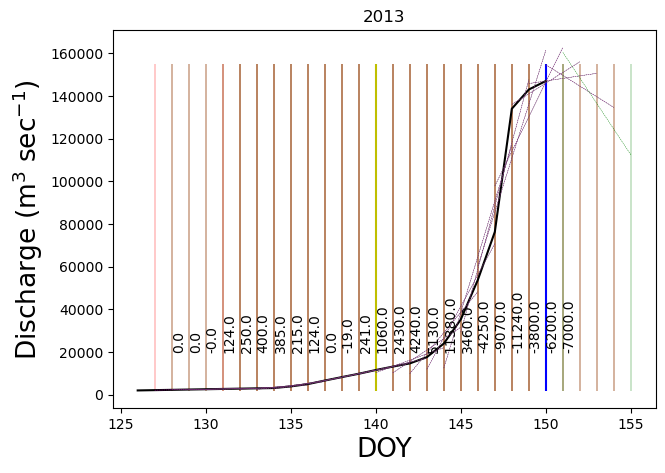

135


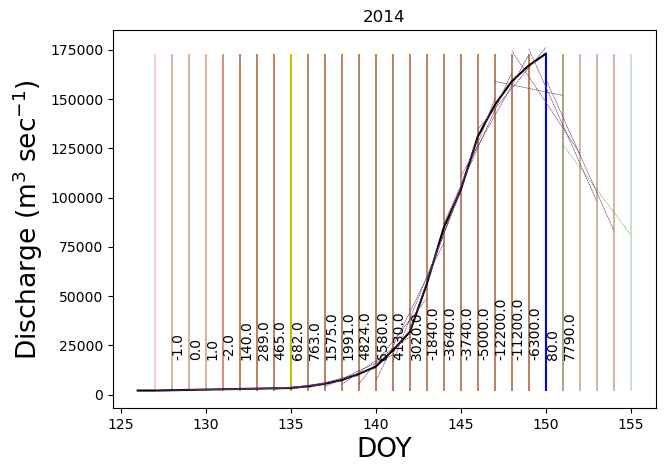

141


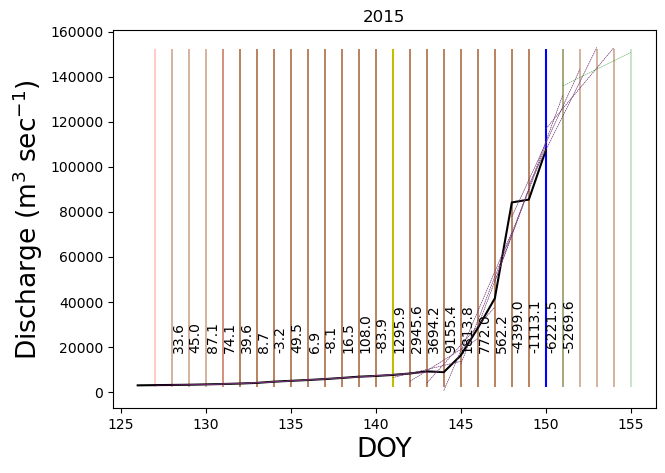

143


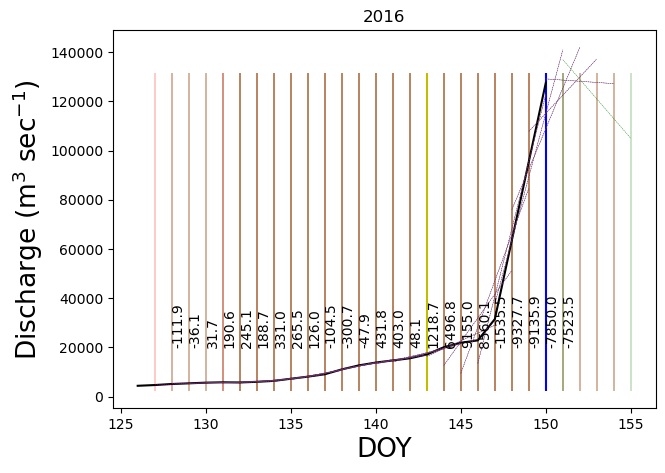

146


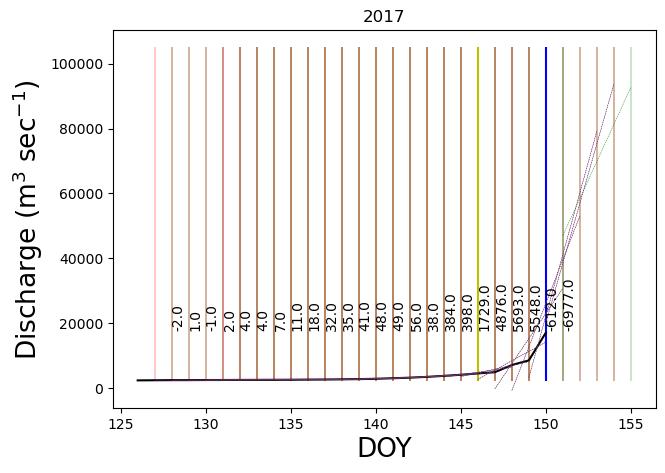

142


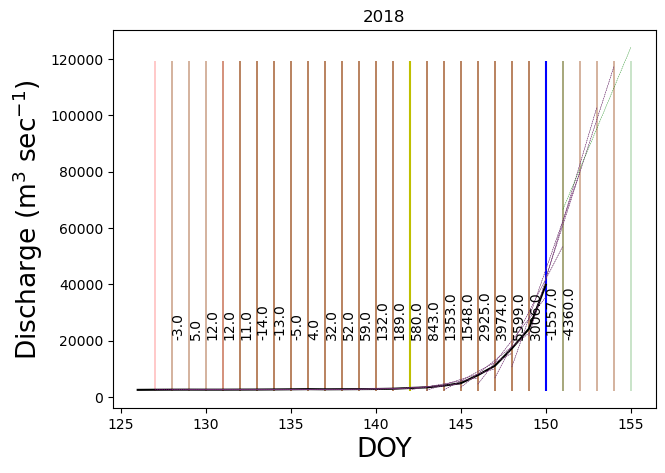

146


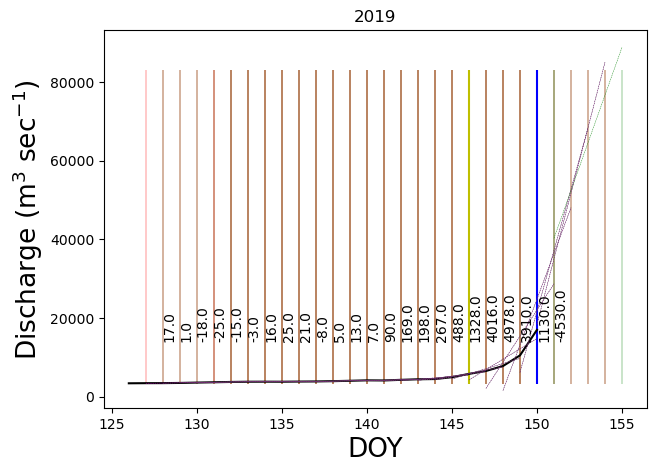

141


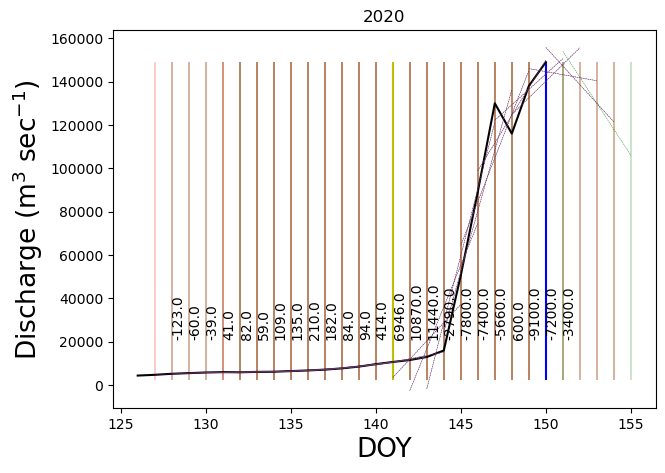

In [50]:
def dischargeSlope(DOYsIn, DischargeIn, DOYsEnd, DischargeEnd ):
    poly_fit_init = np.polyfit(DOYsIn, DischargeIn, 1)
    fit_fn_init = np.poly1d(poly_fit_init)
    SlopeInit = fit_fn_init[1]    
    poly_fit_end = np.polyfit(DOYsEnd, DischargeEnd, 1)
    fit_fn_end = np.poly1d(poly_fit_end)
    Slopeend = fit_fn_end[1]    
    slopeDifference = Slopeend - SlopeInit
    return fit_fn_init, fit_fn_end, slopeDifference
    
Window = 5 # define running window
Time2LookAt = 25 # define days (breakup max date - Time2Lookat) that are considered for the search
Threshold = 500 # define empirical change threshold
DischargeStart=[]


for i, e in enumerate(yearsDischarge[0:]):
    Discharge = Discharge_36to20_unstacked[e].tolist()
    f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=100, sharex=True)
    ax1.set_title(e)
    ax1.plot(DOY[maxDOY-Time2LookAt:maxDOY ], Discharge[maxDOY-Time2LookAt:maxDOY ], "k-")
    found = 0
    for o, s in enumerate(np.arange(1,Time2LookAt,1)[:]):
        Doy1 = DOY[maxDOY-Time2LookAt + s:maxDOY-Time2LookAt + Window + s]
        Doy2 = DOY[maxDOY-Time2LookAt + s + 1:maxDOY-Time2LookAt + Window + s + 1]
        Dis1 = Discharge[maxDOY-Time2LookAt + s:maxDOY-Time2LookAt + Window + s]
        Dis2 = Discharge[maxDOY-Time2LookAt + s + 1:maxDOY-Time2LookAt + Window + s + 1]
        SlopeCalc = dischargeSlope(Doy1, Dis1, Doy2, Dis2)
        if found == 0:
            if SlopeCalc[2]>Threshold:
                DOYPeakStart = Doy2[0]
                found = 1
                print(DOYPeakStart)
        
        ax1.plot(Doy1, SlopeCalc[0](Doy1), "m--", lw=0.3)
        ax1.plot(Doy2, SlopeCalc[1](Doy2), "g--" , lw=0.3)
        ax1.text(Doy2[0],np.nanmean(Discharge), round(SlopeCalc[2], 2), rotation=90 )
        ax1.vlines(Doy1[0], min(Discharge), max(Discharge), "r" , lw=0.3)
        ax1.vlines(Doy1[-1], min(Discharge), max(Discharge), "r" , lw=0.3)
        ax1.vlines(Doy2[0], min(Discharge), max(Discharge), "g" , lw=0.3)
        ax1.vlines(Doy2[-1], min(Discharge), max(Discharge), "g" , lw=0.3)
    ax1.vlines(DOYPeakStart, min(Discharge), max(Discharge), "y" )
    ax1.vlines(maxDOY, min(Discharge), max(Discharge), "b" )
    ax1.set_ylabel("Discharge (m$^3$ sec$^{-1}$)", fontsize=19)
    ax1.set_xlabel("DOY", fontsize=19)
    plt.show()
    
    DischargeStart.append(DOYPeakStart)
    
    
    
###  calc duration of (increasing freshet)

DifferencePeakandStart = np.array(DatesOfMax) - np.array(DischargeStart)

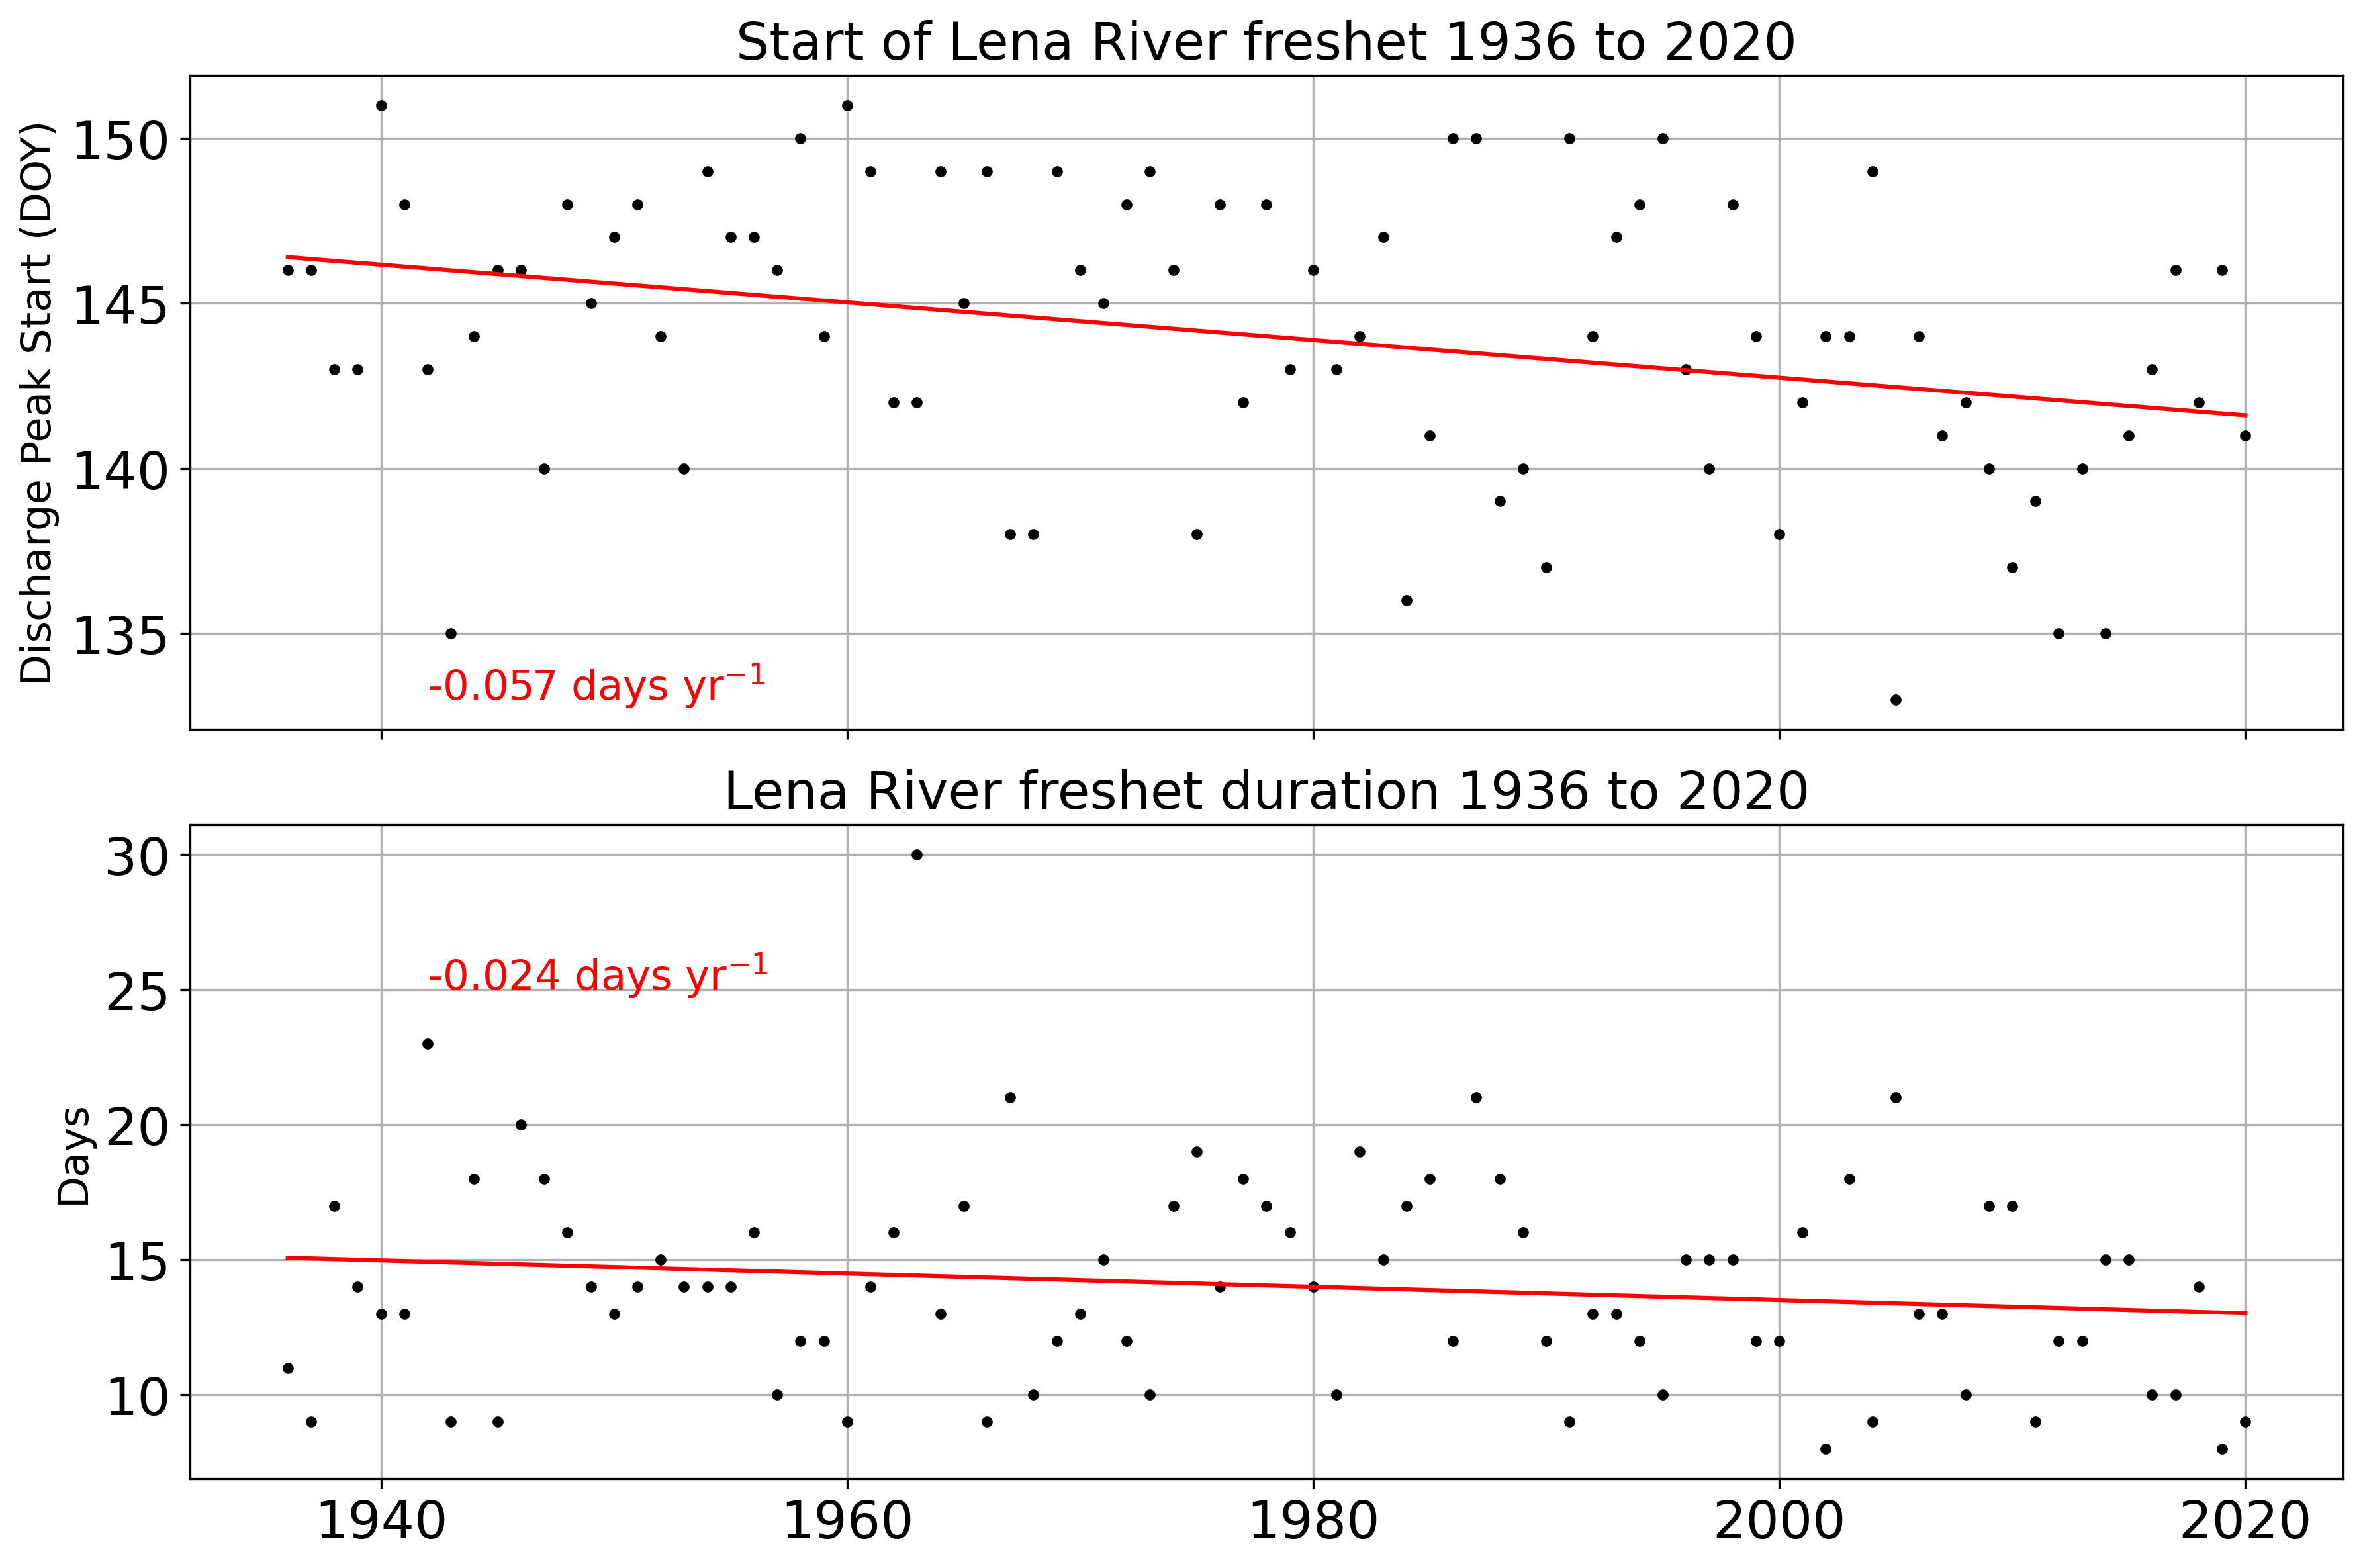

In [56]:
#### Plotting 

f, (( ax1, ax2 )) = plt.subplots(2, 1,figsize=(12,8), dpi=300, sharex=True)

###### linear regression for dates
poly_fit = np.polyfit(yearsDischarge, DischargeStart, 1)
fit_fn = np.poly1d(poly_fit)

Slope = round(fit_fn[1], 3) # slope of linear regression
######

ax1.plot(yearsDischarge, DischargeStart, "k.")
ax1.plot(yearsDischarge, fit_fn(yearsDischarge),"r-" )
ax1.grid()
ax1.set_title("Start of Lena River freshet 1936 to 2020", fontsize=19)
ax1.set_ylabel("Discharge Peak Start (DOY)", fontsize=15) # 10$^{+3}$
ax1.text(1942, 133, str(Slope) + " days yr$^{-1}$", fontsize=15, color= "r")
ax1.tick_params(axis='both', which='major', labelsize=19)

###### linear regression for discharge values
poly_fit = np.polyfit(yearsDischarge, DifferencePeakandStart, 1)
fit_fn = np.poly1d(poly_fit)

Slope = round(fit_fn[1], 3) # slope of linear regression
######


ax2.plot(yearsDischarge, DifferencePeakandStart, "k.")
ax2.plot(yearsDischarge, fit_fn(yearsDischarge),"r-" )
ax2.grid()
ax2.set_title("Lena River freshet duration 1936 to 2020", fontsize=19)
ax2.set_ylabel("Days", fontsize=15) # 10$^{+3}$
ax2.text(1942, 25, str(Slope) + " days yr$^{-1}$", fontsize=15, color= "r")
ax2.tick_params(axis='both', which='major', labelsize=19)

plt.tight_layout()
plt.savefig(PathFigures + "DischargePeakTrends_2.png", dpi=300)
plt.show()